In [1]:
from discriminability_tools import *

import pickle
from IPython.core.display import display, HTML, Markdown
from nilearn.decoding import Decoder
from sklearn.model_selection import StratifiedKFold
from random import randint
import math

import sys
import os
import pandas as pd
import gc

sys.path.append(os.path.abspath("../../ml/"))

from apply_loocv_and_save import *
from dev_wtp_io_utils import *
import gc
import nibabel as nib

from os import path
import multiprocessing
import math
#import statsmodels
from statsmodels.stats.multitest import fdrcorrection


nonbids_data_path = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/"
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"
train_test_markers_filepath = ml_data_folderpath + "/train_test_markers_20210601T183243.csv"
test_train_df = pd.read_csv(train_test_markers_filepath)

all_sst_events= pd.read_csv(ml_data_folderpath +"/SST/" + "all_sst_events.csv")


dataset_name = 'conditions'

from nilearn.decoding import DecoderRegressor, Decoder

script_path = '/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml'
# HRF 2s

#get a PFC mask
#pfc_mask = create_mask_from_images(get_pfc_image_filepaths(ml_data_folderpath + "/"),threshold=10)


def trialtype_resp_trans_func(X):
    return(X.trial_type)

#cpus_available = int(os.getenv('CPUS_PER_TASK'))

#custom thing I have set in my jupyter notebook task.
cpus_available = multiprocessing.cpu_count()

cpus_to_use = min(cpus_available-1,math.floor(0.9*cpus_available))
print(cpus_available, cpus_to_use)

from analyze_results import remove_selected_outliers
from scipy.stats import pearsonr,spearmanr
from matplotlib import pyplot

            
dataset_name = 'conditions'


brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_betaseries_84subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_betaseries_58subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_43subs_correct_cond.pkl'

## get subject IDs in the dataset

all_subjects = load_and_preprocess(
    brain_data_filepath,
    train_test_markers_filepath,
    subjs_to_use = None,
    response_transform_func = trialtype_resp_trans_func,
    clean=None)

all_subjects['groups']

subj_list = np.unique(all_subjects['groups'])

del all_subjects
gc.collect()

summary_results_list = {}




python initialized for apply_loocv_and_save


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


28 25
28
28 25
checked for intersection and no intersection between the brain data and the subjects was found.
there were 58 subjects overlapping between the subjects marked for train data and the training dump file itself.
test_train_set: 9549
pkl_file: 168
brain_data_filepath: 152
train_test_markers_filepath: 141
response_transform_func: 136
sys: 72
Brain_Data_allsubs: 48
clean: 16
subjs_to_use: 16


/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml/apply_loocv_and_save.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brain_Data_allsubs.Y[Brain_Data_allsubs.Y=='NULL']=None


9037
9037


In [2]:
# setup

data_by_ppt_name = "data_by_ppt_2021_12_29.csv"

In [3]:
individual_differences = pd.read_csv(ml_data_folderpath + "/" + data_by_ppt_name)
individual_differences = individual_differences.rename(columns={'SID':'subid'})
individual_differences['wave']=1

In [4]:
mask_list = []



def get_masks_in_folder(mask_folder):
    print(os.listdir(mask_folder))
    mask_name_list = [s for s in os.listdir(mask_folder) if os.path.isdir(mask_folder + s) is False]
        
    return(mask_name_list)

neurosynth_mask_folder = ml_data_folderpath + "/masks/response_inhibition_related/"
harvox_mask_folder = ml_data_folderpath + "/masks/response_inhibition_related/harvardoxford/"

masks_neurosynth = get_masks_in_folder(neurosynth_mask_folder)
masks_harvox = get_masks_in_folder(harvox_mask_folder)

['negative affect_association-test_z_FDR_0.01.nii.gz', 'harvardoxford', 'response inhibition_association-test_z_FDR_0.01.nii.gz', 'negative emotions_association-test_z_FDR_0.01.nii.gz']
['harvardoxford-cortical_prob_Superior Frontal Gyrus.nii.gz', 'harvardoxford-cortical_prob_Frontal Pole.nii.gz', 'harvardoxford-cortical_prob_Cingulate Gyrus, posterior division.nii.gz', 'harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz', 'harvardoxford-cortical_prob_Frontal Operculum Cortex.nii.gz', 'harvardoxford-cortical_prob_Supramarginal Gyrus, posterior division.nii.gz', 'harvardoxford-cortical_prob_Angular Gyrus.nii.gz', 'harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz', 'harvardoxford-cortical_prob_Lateral Occipital Cortex, superior division.nii.gz', 'harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars opercularis.nii.gz', 'harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars triangularis.nii.gz', 'harvardoxford-cortical_prob_Insular Cortex.nii.gz']


In [7]:
mask_list = [neurosynth_mask_folder + s for s in masks_neurosynth] + [neurosynth_mask_folder + s for s in masks_harvox]

In [8]:
mask_list

['/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/negative affect_association-test_z_FDR_0.01.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/response inhibition_association-test_z_FDR_0.01.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/negative emotions_association-test_z_FDR_0.01.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/harvardoxford-cortical_prob_Superior Frontal Gyrus.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/harvardoxford-cortical_prob_Frontal Pole.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/harvardoxford-cortical_prob_Cingulate Gyrus, posterior division.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/harvardoxford-cortical

In [9]:
def display_discriminability_correlations(ind_div_combined_3sd, neural_vars, correlations):
    tabular_summary_list = []
    for neural_var in neural_vars:#:
        display(Markdown("### " + neural_var))
        for correlate in correlations: 
            display(Markdown("#### " + correlate))
            nan_rows = np.isnan(ind_div_combined_3sd[correlate]) | np.isnan(ind_div_combined_3sd[neural_var])
            cor2way_df = ind_div_combined_3sd.loc[nan_rows==False,]
            pearson_result = pearsonr(cor2way_df[neural_var],cor2way_df[correlate])
            display(HTML("r=" + format(pearson_result[0],".2f") +"; p-value=" + format(pearson_result[1],".4f")))
            spearman_result = spearmanr(cor2way_df[neural_var],cor2way_df[correlate])
            display(HTML("rho=" + format(spearman_result[0],".2f") +"; p-value=" + format(spearman_result[1],".4f")))
            cplot = pyplot.scatter(cor2way_df[neural_var],cor2way_df[correlate])
            cplot.axes.set_xlabel(neural_var)
            cplot.axes.ylabel=correlate
            pyplot.show()
            
            tabular_summary = {
                'neural_var':neural_var,
                'correlate':correlate,
                "pearson's r":pearson_result[0],
                "pearson's r p-value":pearson_result[1],
                "spearman's rho":spearman_result[0],
                "spearman's rho p-value":spearman_result[1]
            }
            
            tabular_summary_list = tabular_summary_list + [tabular_summary]
           
    tabular_summary = pd.DataFrame(tabular_summary_list)
    return(tabular_summary)
    
            

            
    
            

## This section iterates through everything and prints. We need to 

### TESQ-E

In [10]:
def display_discriminability_correlations_tesq(ind_div_combined_3sd):
    return(display_discriminability_correlations(
        ind_div_combined_3sd,
        neural_vars = ['discriminability_overfit_accuracy','discriminability_mean_cv_scores'],
        correlations = ['SST_SSRT','TESQ_E_suppression', 'TESQ_E_avoidance_of_temptations', 
             'TESQ_E_goal_deliberation', 'TESQ_E_controlling_temptations', 'TESQ_E_distraction',
             'TESQ_E_goal_and_rule_setting'
            ]
    ))
           
def remove_selected_outliers_tesq_study(ind_div_combined,show_plot=False):
    
    idc_outliers_removed = remove_selected_outliers(ind_div_combined,
    ['discriminability_overfit_accuracy','discriminability_mean_cv_scores',
        'BFI_extraversion','RMQ_locomotion','ses_aggregate','PLAN_cognitive_strategies',
     'SST_SSRT','BIS_11','BSCS','TESQ_E_suppression', 'TESQ_E_avoidance_of_temptations', 
     'TESQ_E_goal_deliberation', 'TESQ_E_controlling_temptations', 'TESQ_E_distraction',
     'TESQ_E_goal_and_rule_setting','EDM','RS','TRSQ','ROC_Crave_Regulate_Minus_Look',
     'SRHI_unhealthy',
     'cancer_promoting_minus_preventing_FFQ','bf_1'],
    show_plot=False)
    return(idc_outliers_removed)


In [11]:
discriminability_version_id="v_1"

## negative affect_association-test_z_FDR_0

### discriminability_overfit_accuracy

#### SST_SSRT

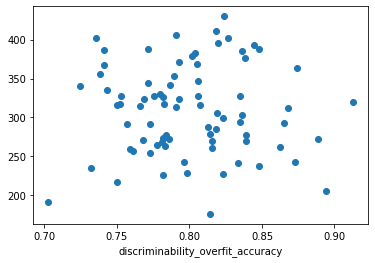

#### TESQ_E_suppression

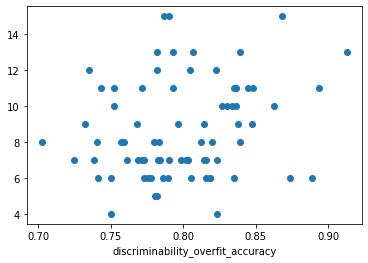

#### TESQ_E_avoidance_of_temptations

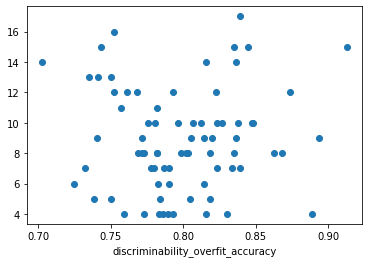

#### TESQ_E_goal_deliberation

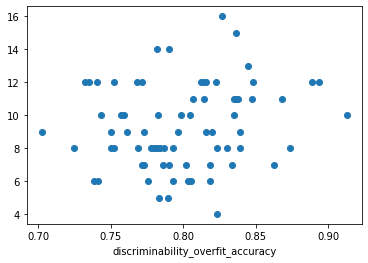

#### TESQ_E_controlling_temptations

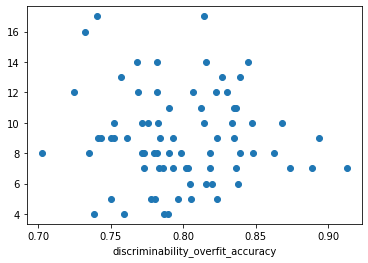

#### TESQ_E_distraction

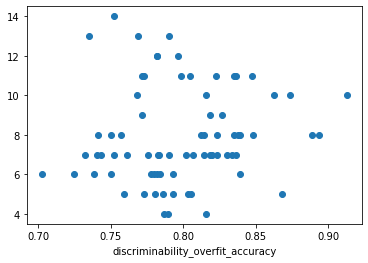

#### TESQ_E_goal_and_rule_setting

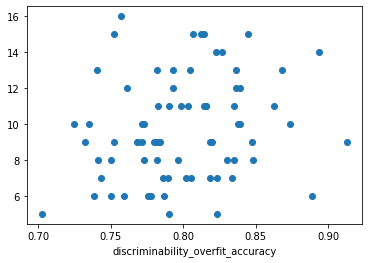

### discriminability_mean_cv_scores

#### SST_SSRT

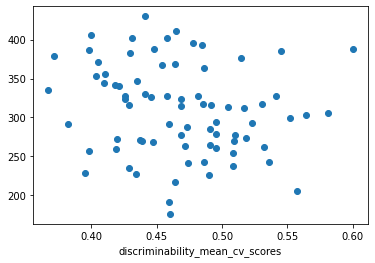

#### TESQ_E_suppression

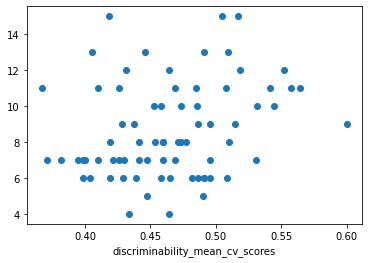

#### TESQ_E_avoidance_of_temptations

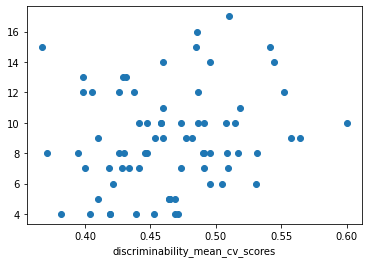

#### TESQ_E_goal_deliberation

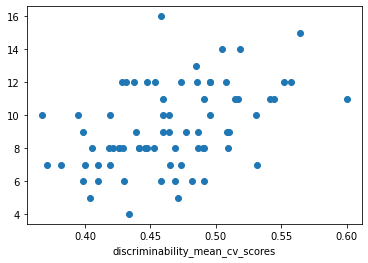

#### TESQ_E_controlling_temptations

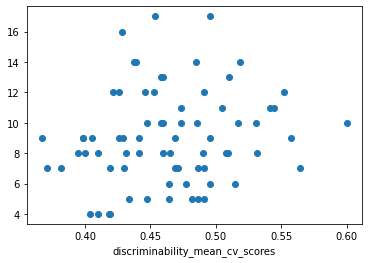

#### TESQ_E_distraction

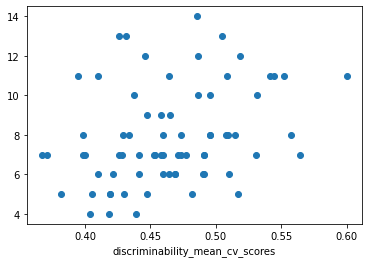

#### TESQ_E_goal_and_rule_setting

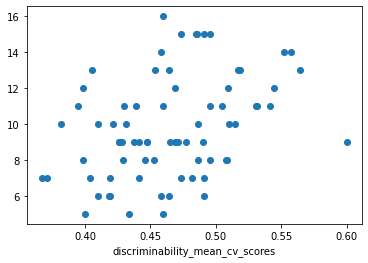

## response inhibition_association-test_z_FDR_0

### discriminability_overfit_accuracy

#### SST_SSRT

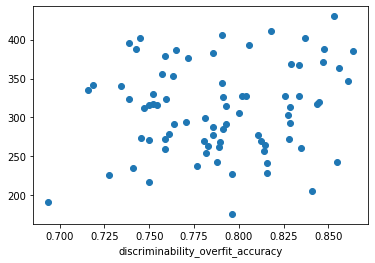

#### TESQ_E_suppression

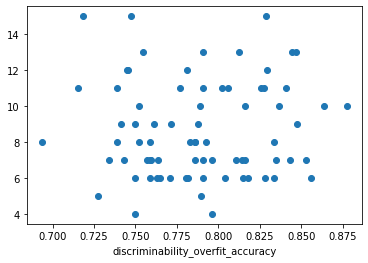

#### TESQ_E_avoidance_of_temptations

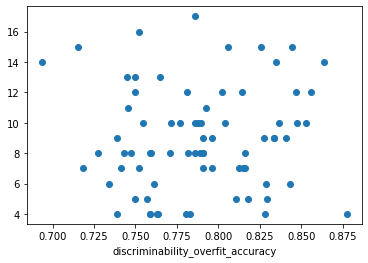

#### TESQ_E_goal_deliberation

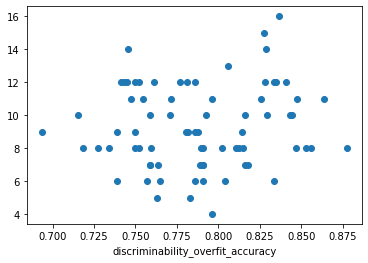

#### TESQ_E_controlling_temptations

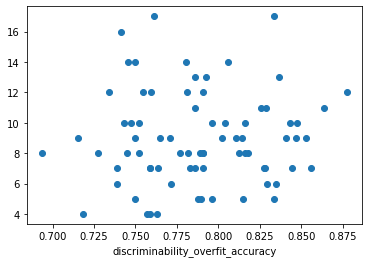

#### TESQ_E_distraction

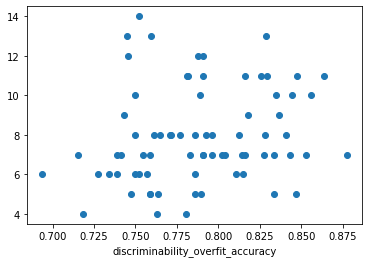

#### TESQ_E_goal_and_rule_setting

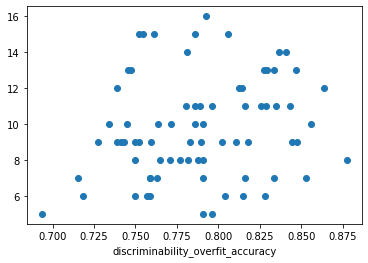

### discriminability_mean_cv_scores

#### SST_SSRT

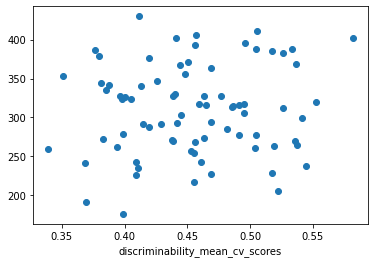

#### TESQ_E_suppression

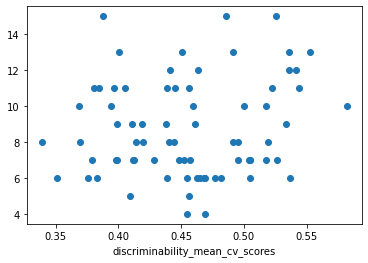

#### TESQ_E_avoidance_of_temptations

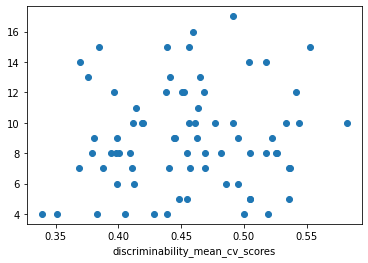

#### TESQ_E_goal_deliberation

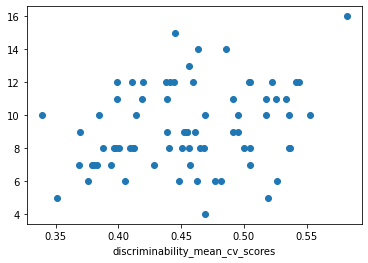

#### TESQ_E_controlling_temptations

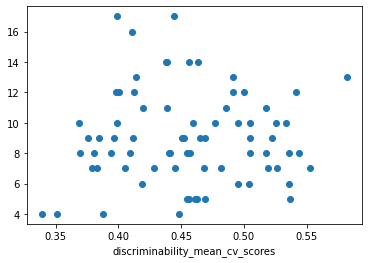

#### TESQ_E_distraction

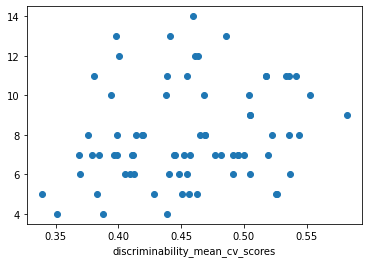

#### TESQ_E_goal_and_rule_setting

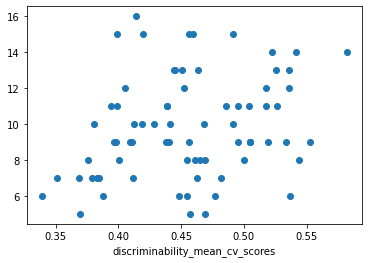

## negative emotions_association-test_z_FDR_0

### discriminability_overfit_accuracy

#### SST_SSRT

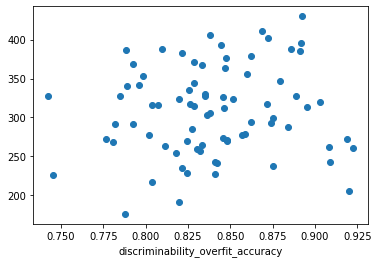

#### TESQ_E_suppression

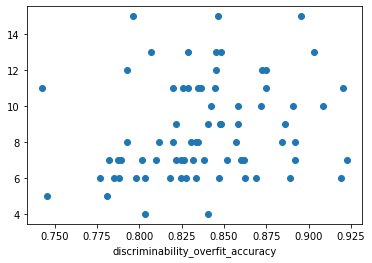

#### TESQ_E_avoidance_of_temptations

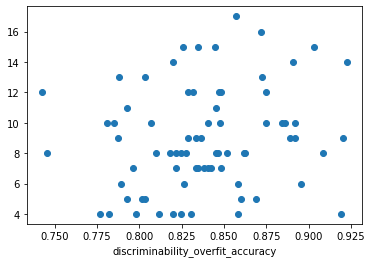

#### TESQ_E_goal_deliberation

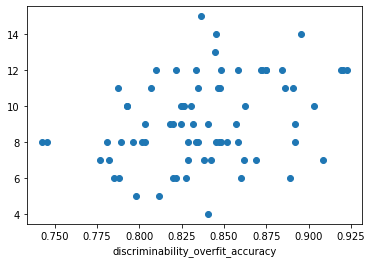

#### TESQ_E_controlling_temptations

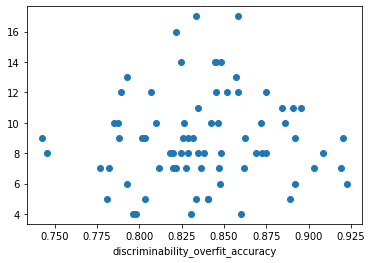

#### TESQ_E_distraction

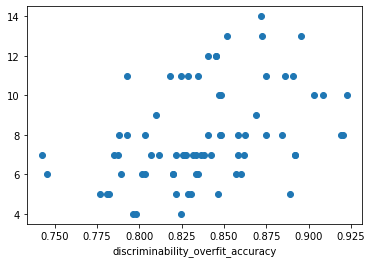

#### TESQ_E_goal_and_rule_setting

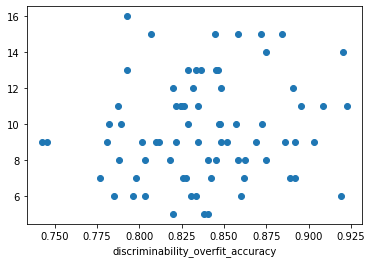

### discriminability_mean_cv_scores

#### SST_SSRT

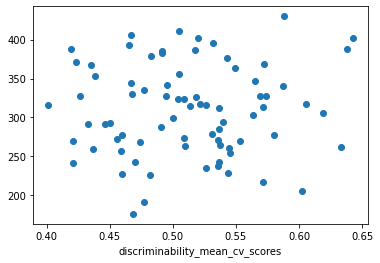

#### TESQ_E_suppression

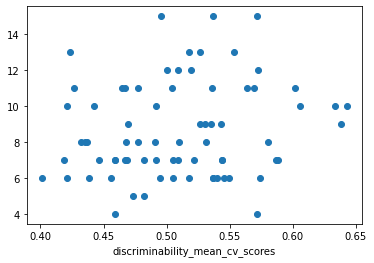

#### TESQ_E_avoidance_of_temptations

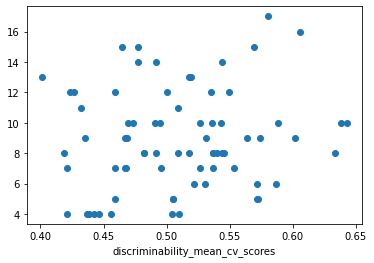

#### TESQ_E_goal_deliberation

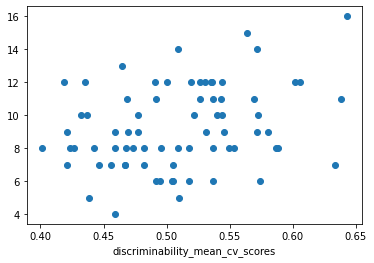

#### TESQ_E_controlling_temptations

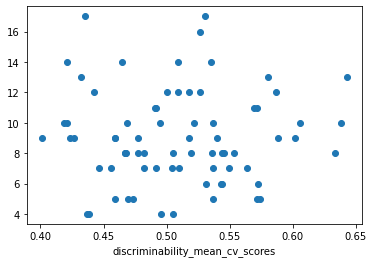

#### TESQ_E_distraction

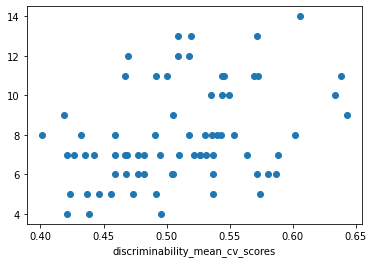

#### TESQ_E_goal_and_rule_setting

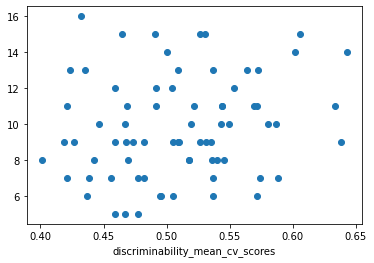

## harvardoxford-cortical_prob_Superior Frontal Gyrus

### discriminability_overfit_accuracy

#### SST_SSRT

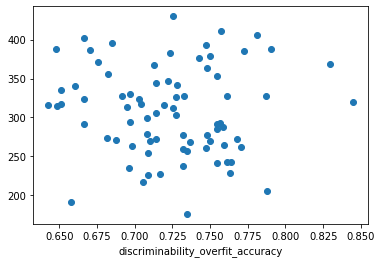

#### TESQ_E_suppression

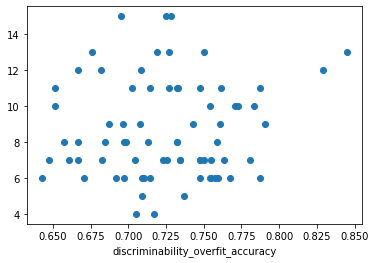

#### TESQ_E_avoidance_of_temptations

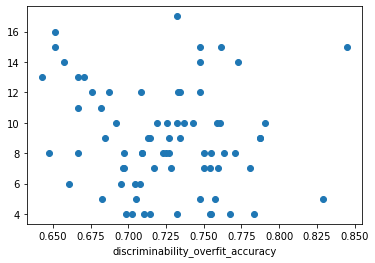

#### TESQ_E_goal_deliberation

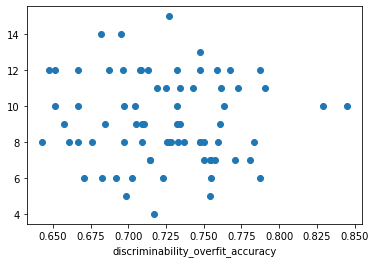

#### TESQ_E_controlling_temptations

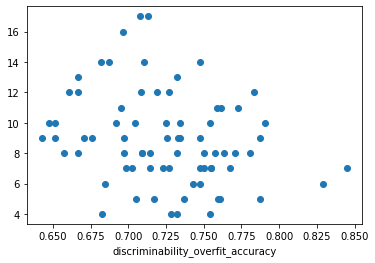

#### TESQ_E_distraction

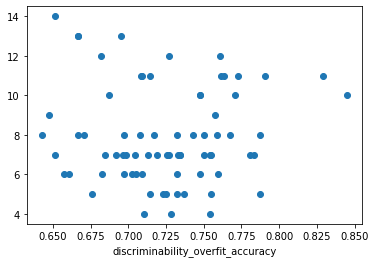

#### TESQ_E_goal_and_rule_setting

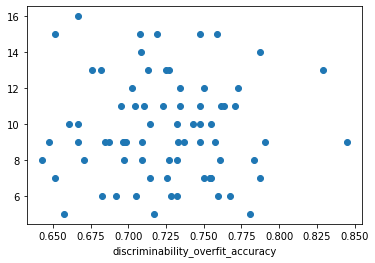

### discriminability_mean_cv_scores

#### SST_SSRT

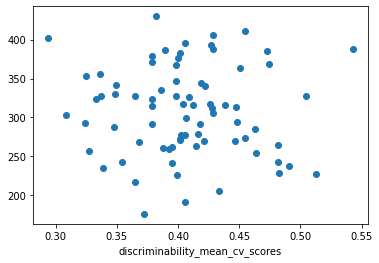

#### TESQ_E_suppression

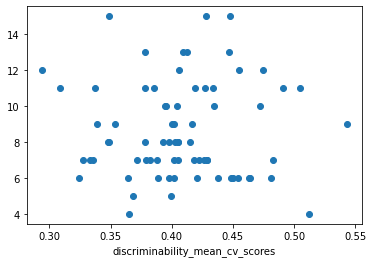

#### TESQ_E_avoidance_of_temptations

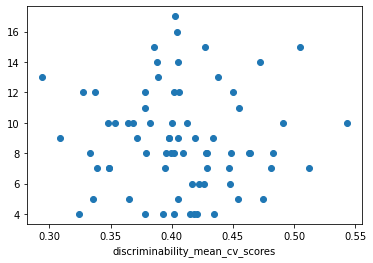

#### TESQ_E_goal_deliberation

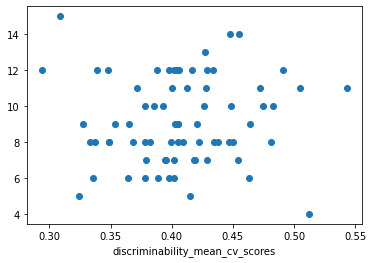

#### TESQ_E_controlling_temptations

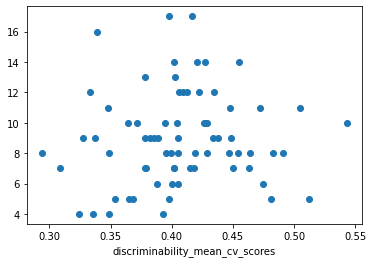

#### TESQ_E_distraction

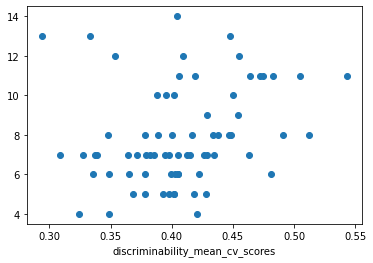

#### TESQ_E_goal_and_rule_setting

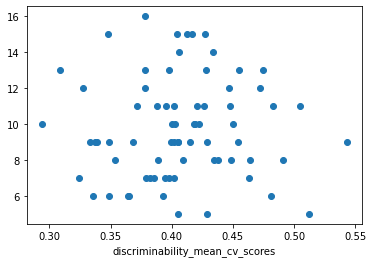

## harvardoxford-cortical_prob_Frontal Pole

### discriminability_overfit_accuracy

#### SST_SSRT

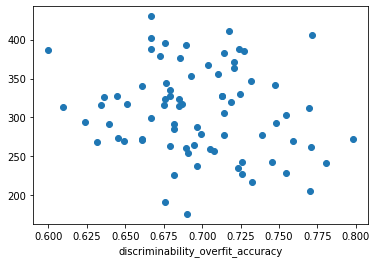

#### TESQ_E_suppression

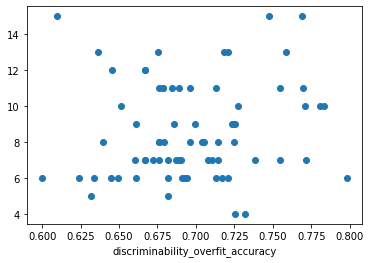

#### TESQ_E_avoidance_of_temptations

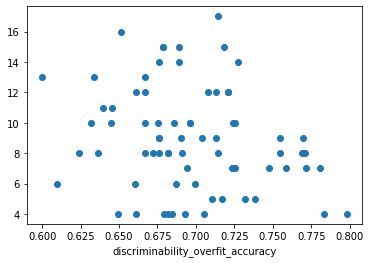

#### TESQ_E_goal_deliberation

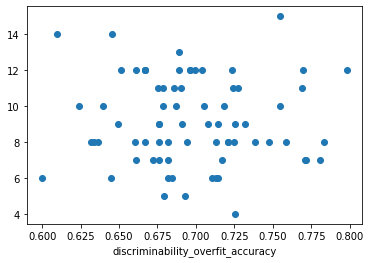

#### TESQ_E_controlling_temptations

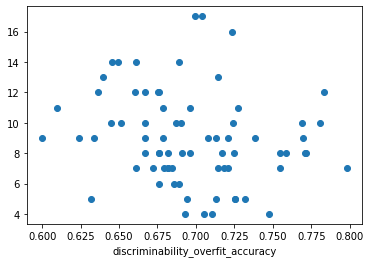

#### TESQ_E_distraction

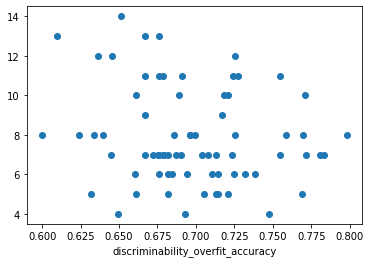

#### TESQ_E_goal_and_rule_setting

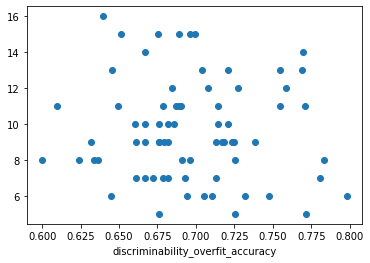

### discriminability_mean_cv_scores

#### SST_SSRT

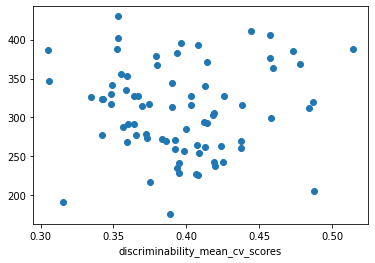

#### TESQ_E_suppression

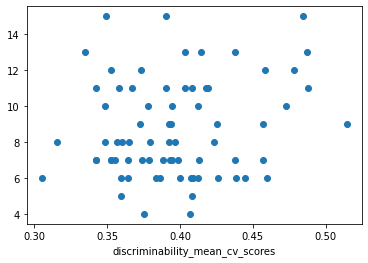

#### TESQ_E_avoidance_of_temptations

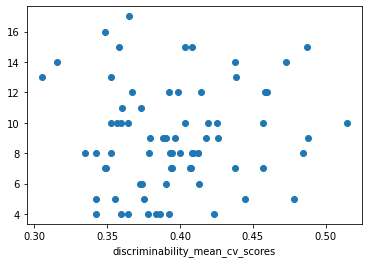

#### TESQ_E_goal_deliberation

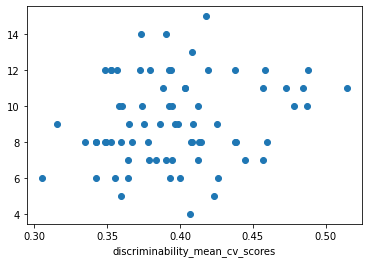

#### TESQ_E_controlling_temptations

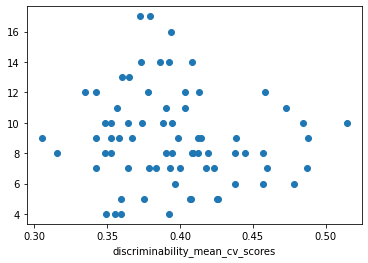

#### TESQ_E_distraction

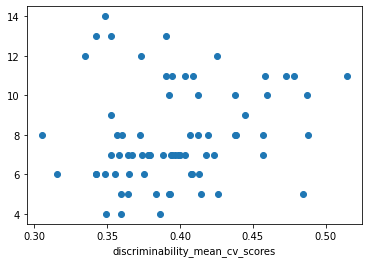

#### TESQ_E_goal_and_rule_setting

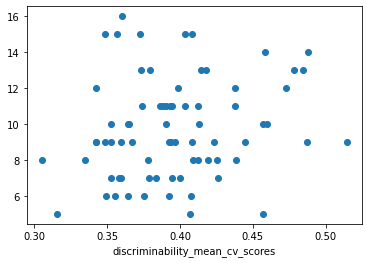

## harvardoxford-cortical_prob_Cingulate Gyrus, posterior division

### discriminability_overfit_accuracy

#### SST_SSRT

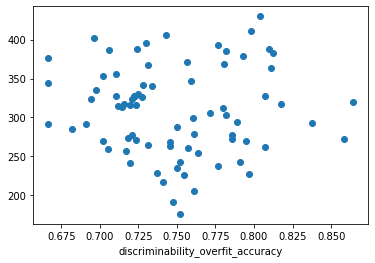

#### TESQ_E_suppression

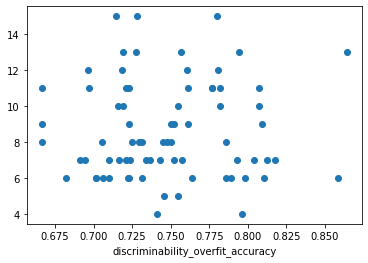

#### TESQ_E_avoidance_of_temptations

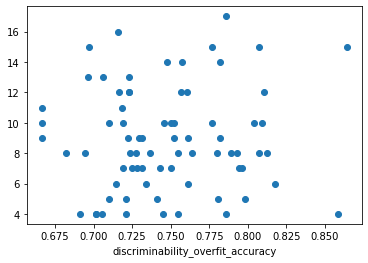

#### TESQ_E_goal_deliberation

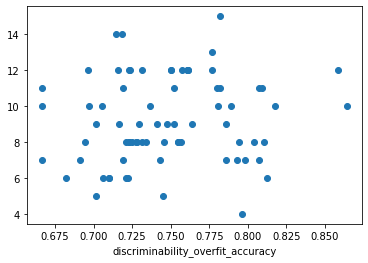

#### TESQ_E_controlling_temptations

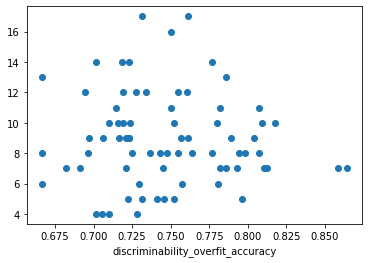

#### TESQ_E_distraction

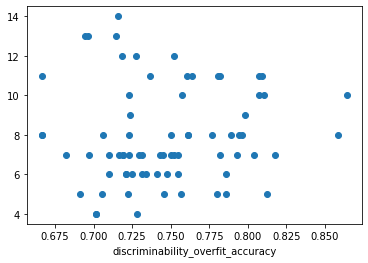

#### TESQ_E_goal_and_rule_setting

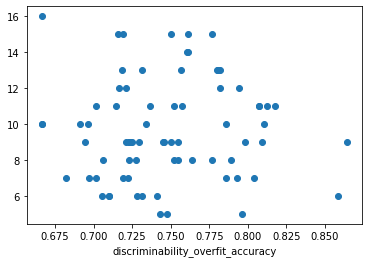

### discriminability_mean_cv_scores

#### SST_SSRT

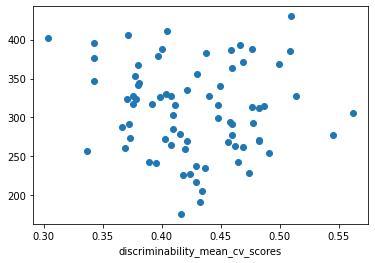

#### TESQ_E_suppression

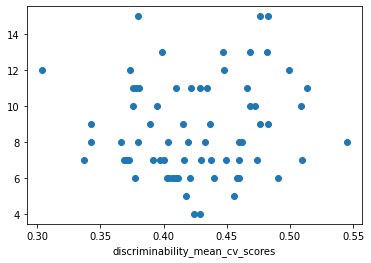

#### TESQ_E_avoidance_of_temptations

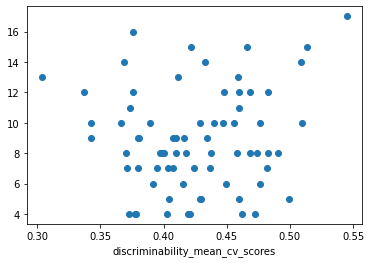

#### TESQ_E_goal_deliberation

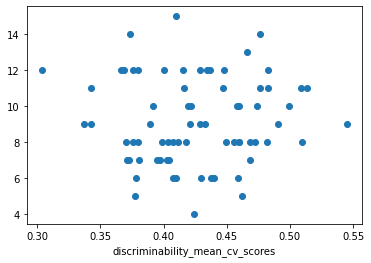

#### TESQ_E_controlling_temptations

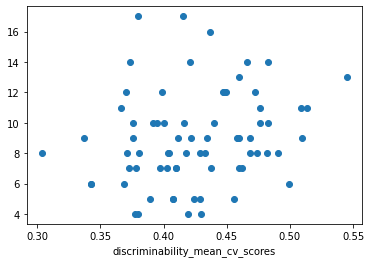

#### TESQ_E_distraction

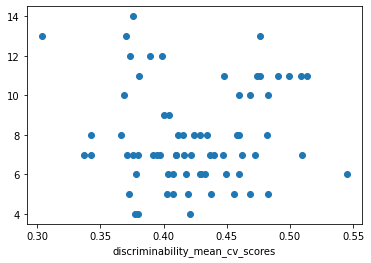

#### TESQ_E_goal_and_rule_setting

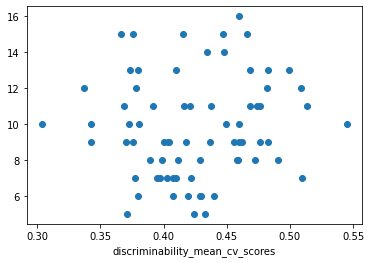

## harvardoxford-cortical_prob_Frontal Orbital Cortex

### discriminability_overfit_accuracy

#### SST_SSRT

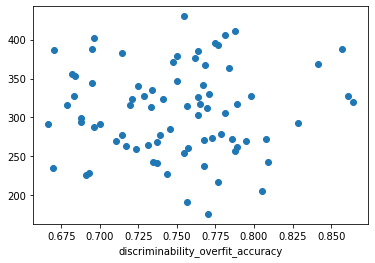

#### TESQ_E_suppression

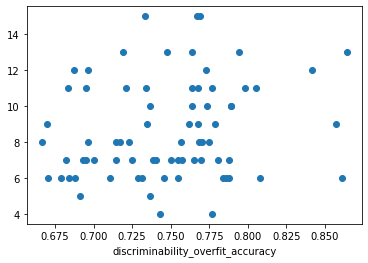

#### TESQ_E_avoidance_of_temptations

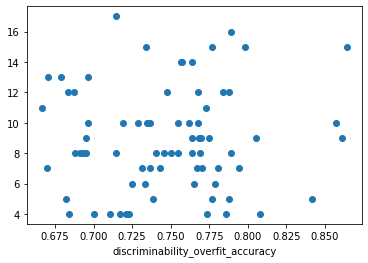

#### TESQ_E_goal_deliberation

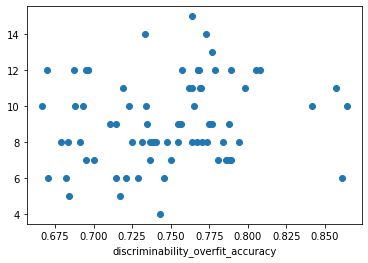

#### TESQ_E_controlling_temptations

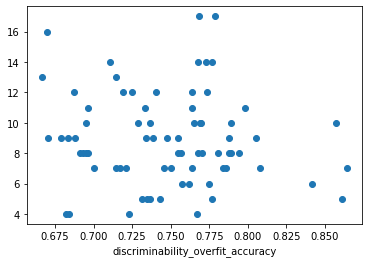

#### TESQ_E_distraction

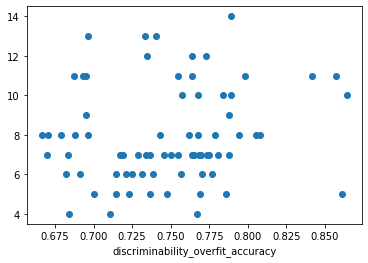

#### TESQ_E_goal_and_rule_setting

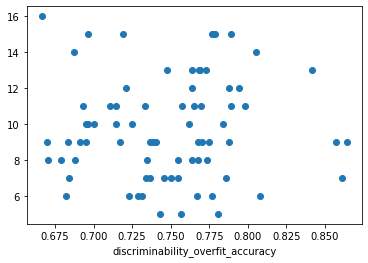

### discriminability_mean_cv_scores

#### SST_SSRT

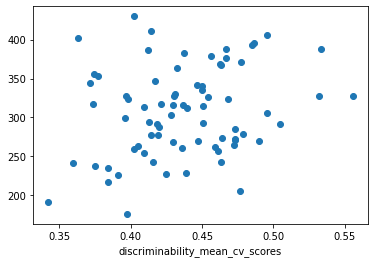

#### TESQ_E_suppression

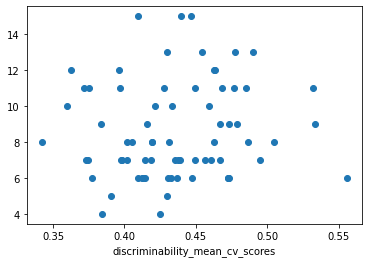

#### TESQ_E_avoidance_of_temptations

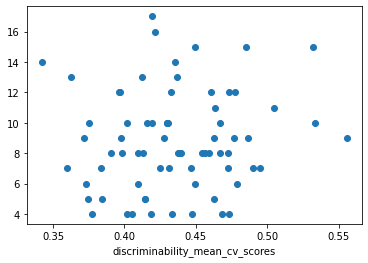

#### TESQ_E_goal_deliberation

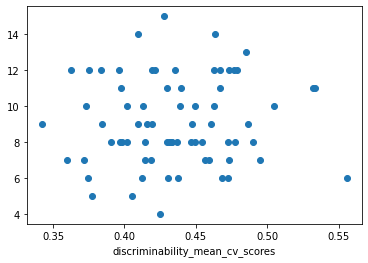

#### TESQ_E_controlling_temptations

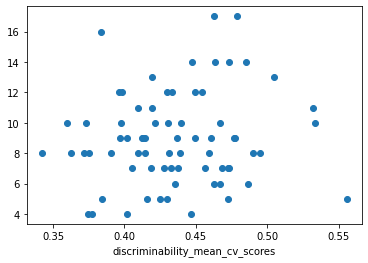

#### TESQ_E_distraction

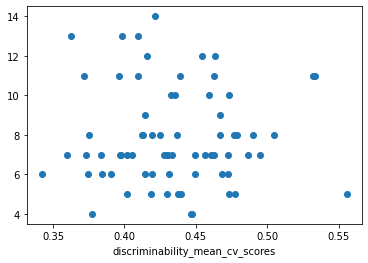

#### TESQ_E_goal_and_rule_setting

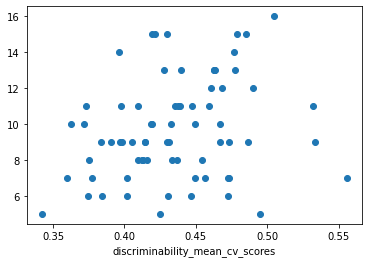

## harvardoxford-cortical_prob_Frontal Operculum Cortex

### discriminability_overfit_accuracy

#### SST_SSRT

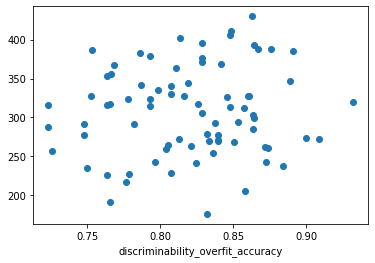

#### TESQ_E_suppression

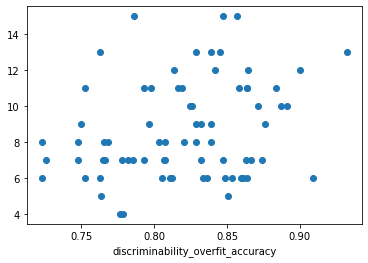

#### TESQ_E_avoidance_of_temptations

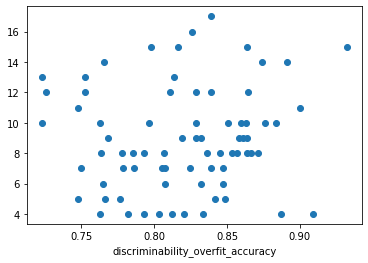

#### TESQ_E_goal_deliberation

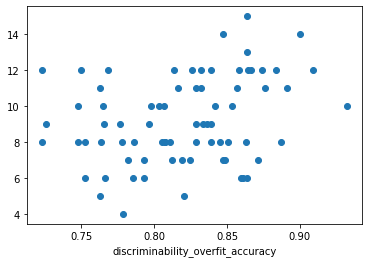

#### TESQ_E_controlling_temptations

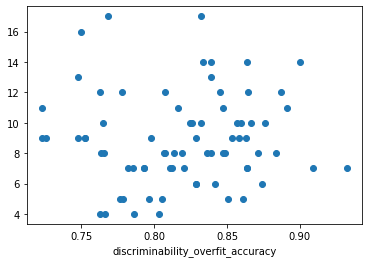

#### TESQ_E_distraction

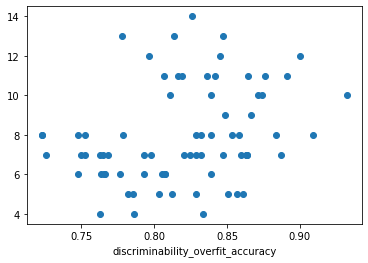

#### TESQ_E_goal_and_rule_setting

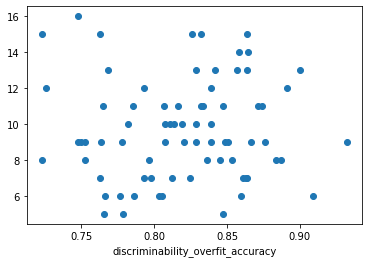

### discriminability_mean_cv_scores

#### SST_SSRT

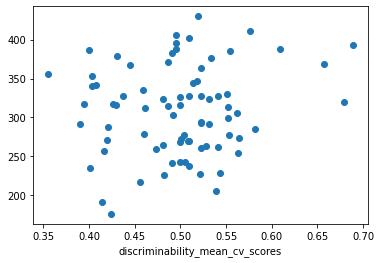

#### TESQ_E_suppression

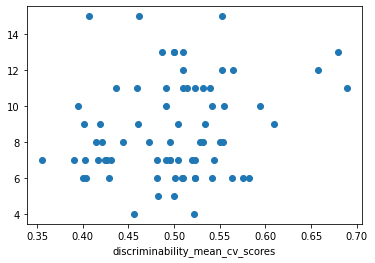

#### TESQ_E_avoidance_of_temptations

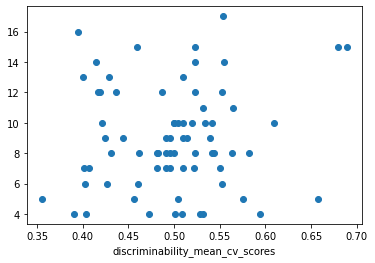

#### TESQ_E_goal_deliberation

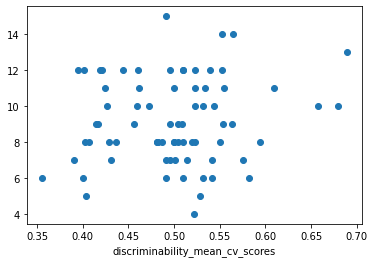

#### TESQ_E_controlling_temptations

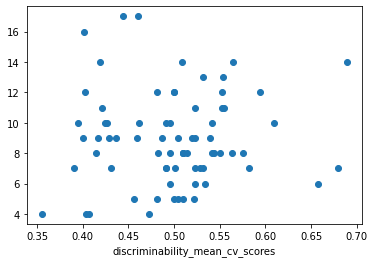

#### TESQ_E_distraction

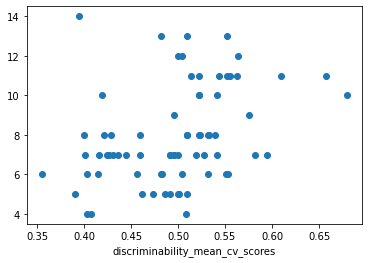

#### TESQ_E_goal_and_rule_setting

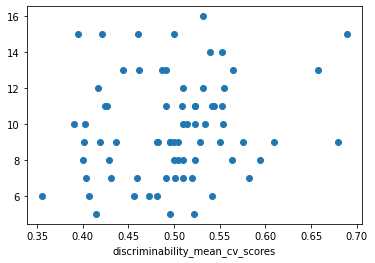

## harvardoxford-cortical_prob_Supramarginal Gyrus, posterior division

### discriminability_overfit_accuracy

#### SST_SSRT

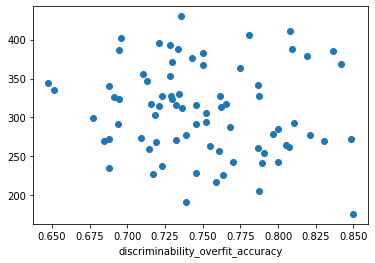

#### TESQ_E_suppression

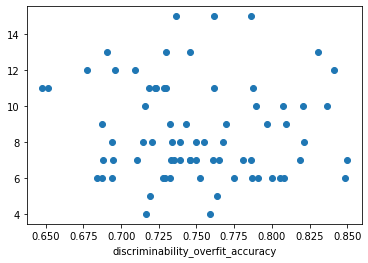

#### TESQ_E_avoidance_of_temptations

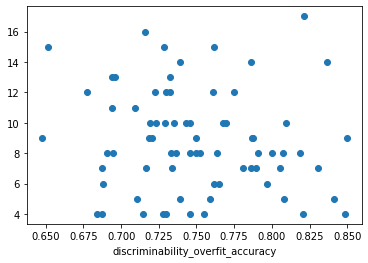

#### TESQ_E_goal_deliberation

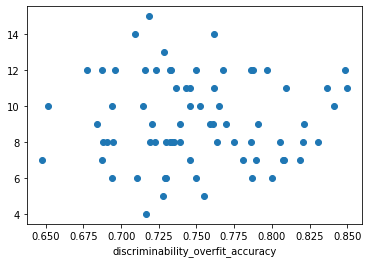

#### TESQ_E_controlling_temptations

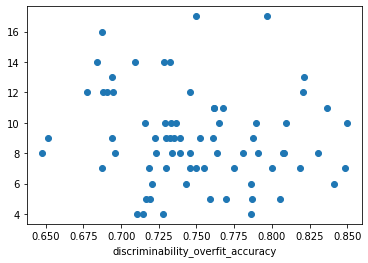

#### TESQ_E_distraction

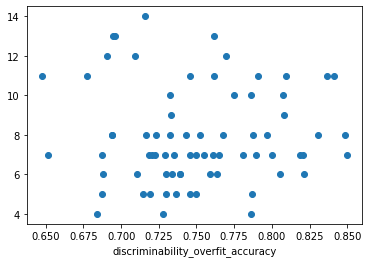

#### TESQ_E_goal_and_rule_setting

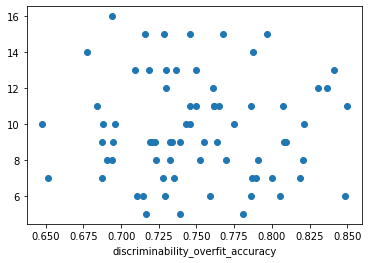

### discriminability_mean_cv_scores

#### SST_SSRT

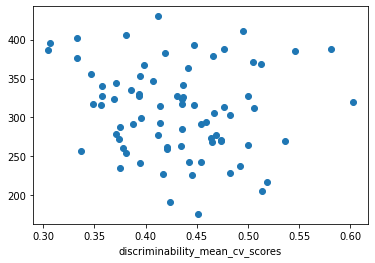

#### TESQ_E_suppression

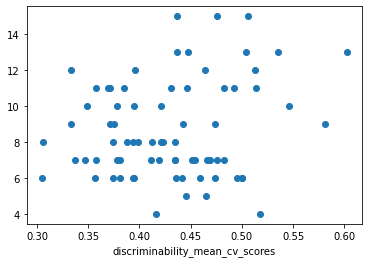

#### TESQ_E_avoidance_of_temptations

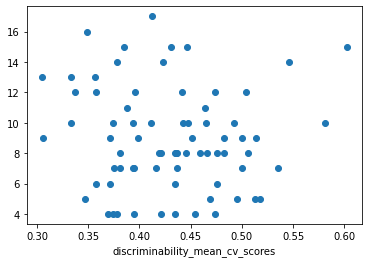

#### TESQ_E_goal_deliberation

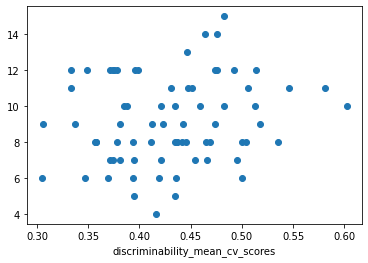

#### TESQ_E_controlling_temptations

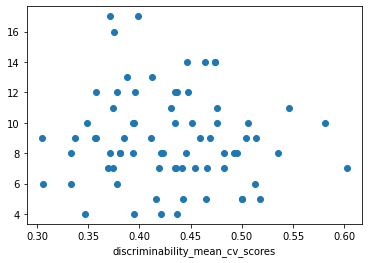

#### TESQ_E_distraction

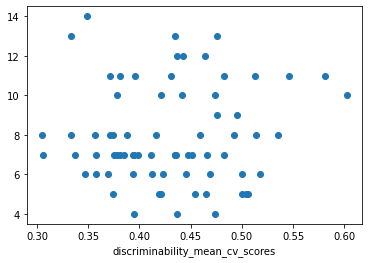

#### TESQ_E_goal_and_rule_setting

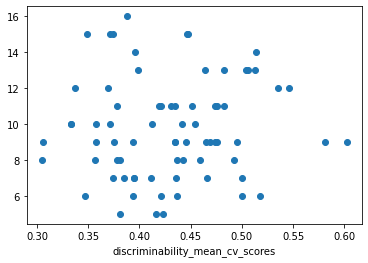

## harvardoxford-cortical_prob_Angular Gyrus

### discriminability_overfit_accuracy

#### SST_SSRT

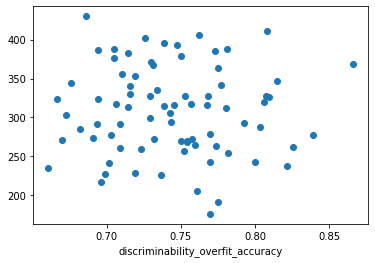

#### TESQ_E_suppression

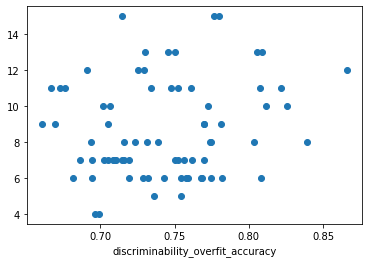

#### TESQ_E_avoidance_of_temptations

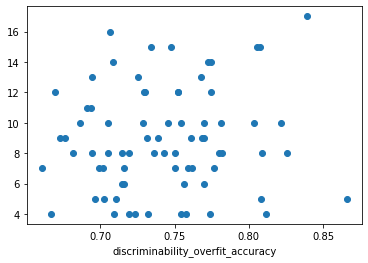

#### TESQ_E_goal_deliberation

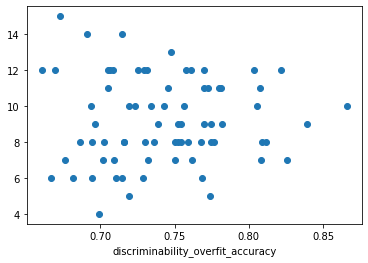

#### TESQ_E_controlling_temptations

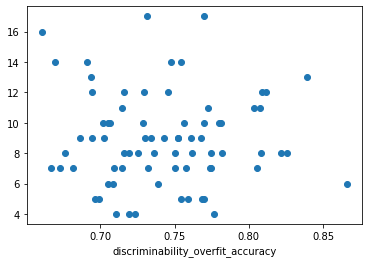

#### TESQ_E_distraction

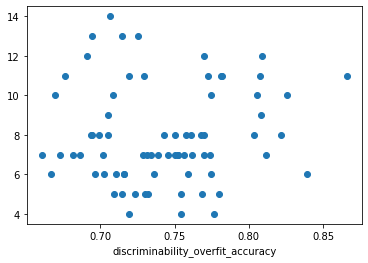

#### TESQ_E_goal_and_rule_setting

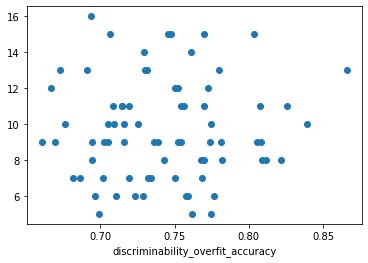

### discriminability_mean_cv_scores

#### SST_SSRT

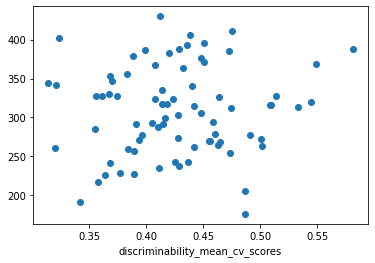

#### TESQ_E_suppression

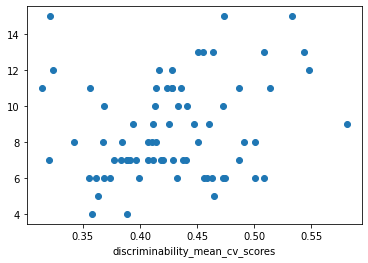

#### TESQ_E_avoidance_of_temptations

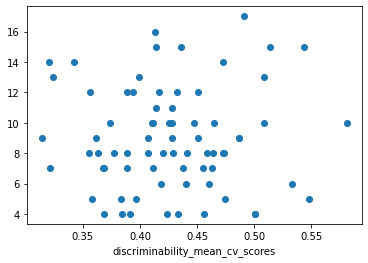

#### TESQ_E_goal_deliberation

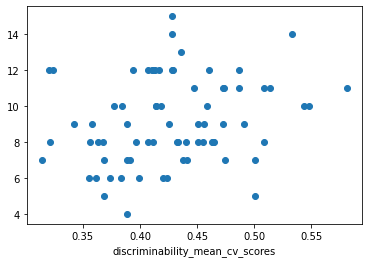

#### TESQ_E_controlling_temptations

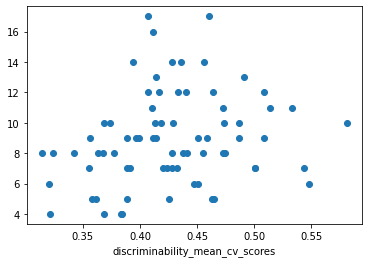

#### TESQ_E_distraction

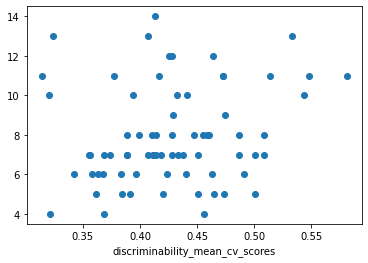

#### TESQ_E_goal_and_rule_setting

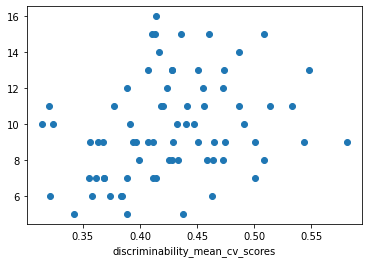

## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

### discriminability_overfit_accuracy

#### SST_SSRT

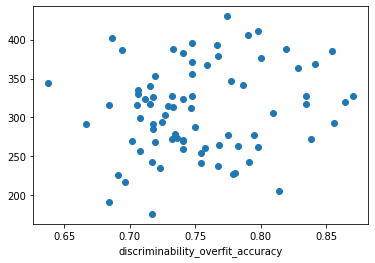

#### TESQ_E_suppression

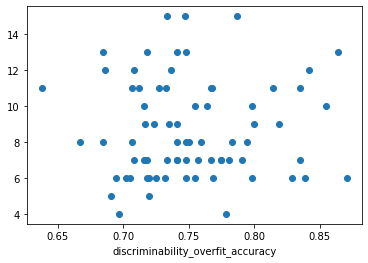

#### TESQ_E_avoidance_of_temptations

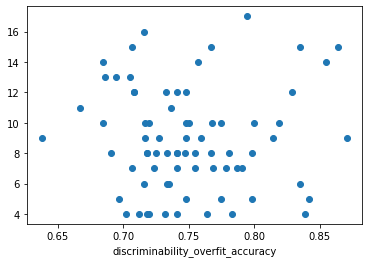

#### TESQ_E_goal_deliberation

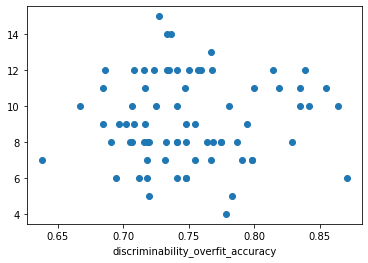

#### TESQ_E_controlling_temptations

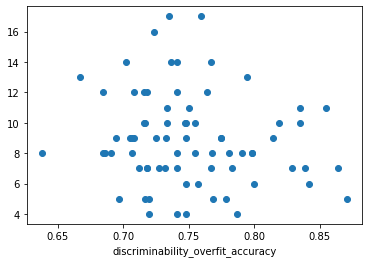

#### TESQ_E_distraction

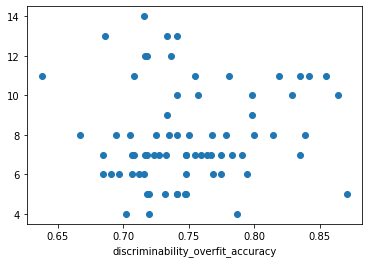

#### TESQ_E_goal_and_rule_setting

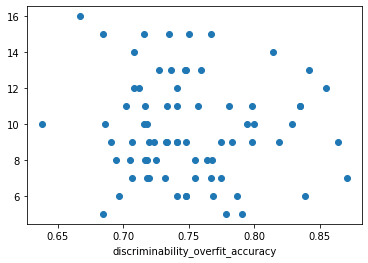

### discriminability_mean_cv_scores

#### SST_SSRT

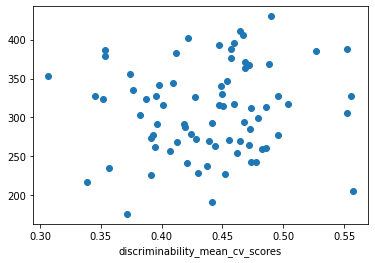

#### TESQ_E_suppression

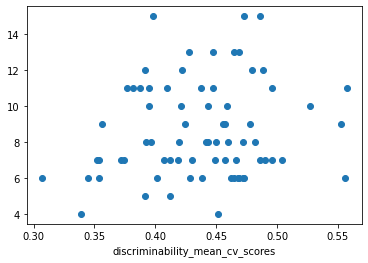

#### TESQ_E_avoidance_of_temptations

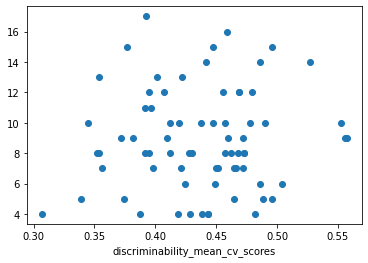

#### TESQ_E_goal_deliberation

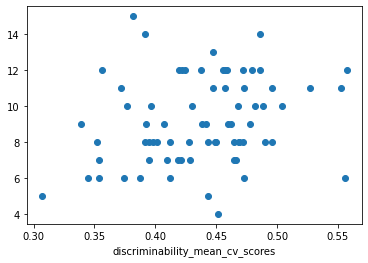

#### TESQ_E_controlling_temptations

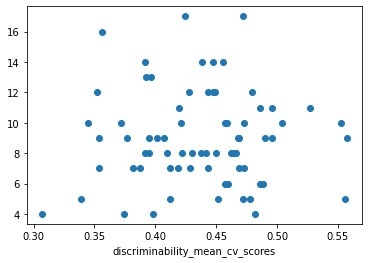

#### TESQ_E_distraction

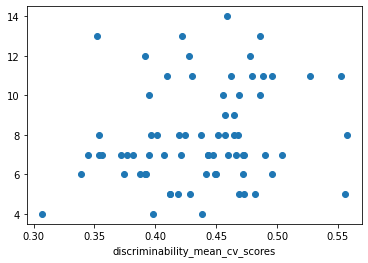

#### TESQ_E_goal_and_rule_setting

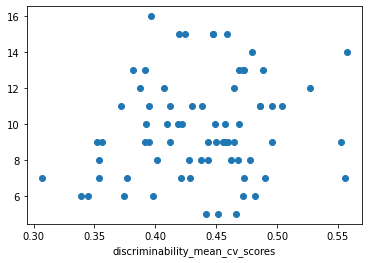

## harvardoxford-cortical_prob_Lateral Occipital Cortex, superior division

### discriminability_overfit_accuracy

#### SST_SSRT

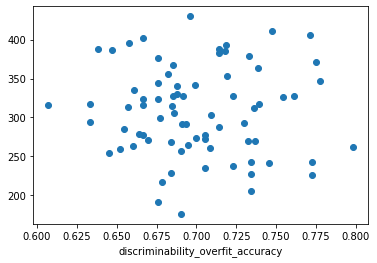

#### TESQ_E_suppression

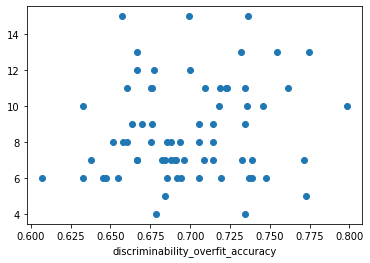

#### TESQ_E_avoidance_of_temptations

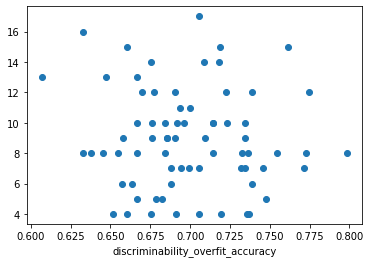

#### TESQ_E_goal_deliberation

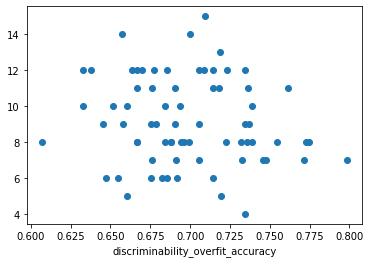

#### TESQ_E_controlling_temptations

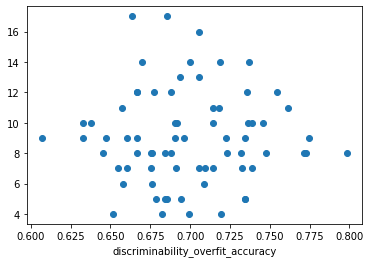

#### TESQ_E_distraction

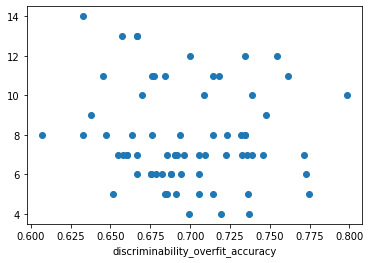

#### TESQ_E_goal_and_rule_setting

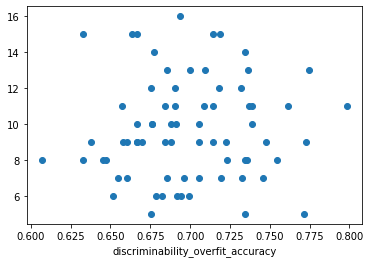

### discriminability_mean_cv_scores

#### SST_SSRT

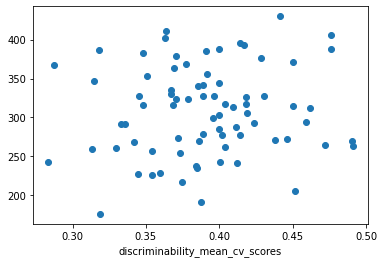

#### TESQ_E_suppression

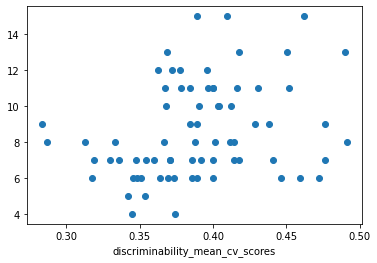

#### TESQ_E_avoidance_of_temptations

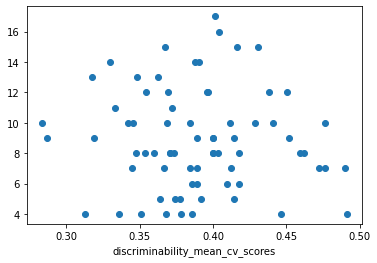

#### TESQ_E_goal_deliberation

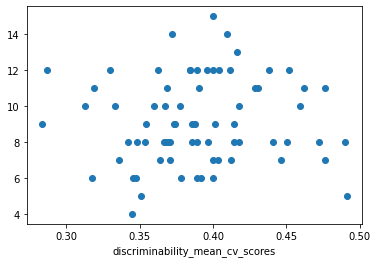

#### TESQ_E_controlling_temptations

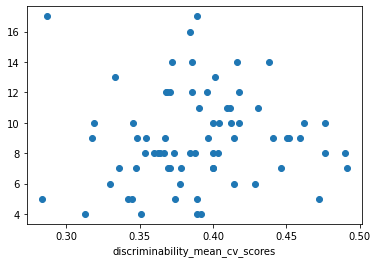

#### TESQ_E_distraction

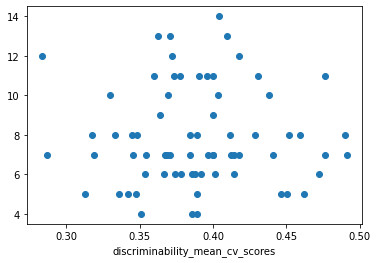

#### TESQ_E_goal_and_rule_setting

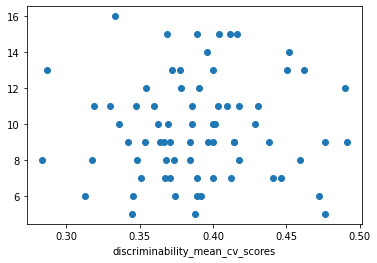

## harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars opercularis

### discriminability_overfit_accuracy

#### SST_SSRT

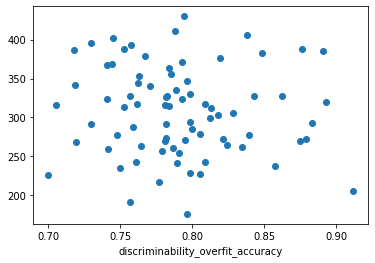

#### TESQ_E_suppression

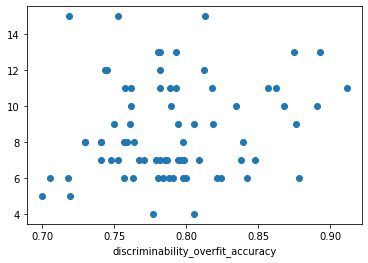

#### TESQ_E_avoidance_of_temptations

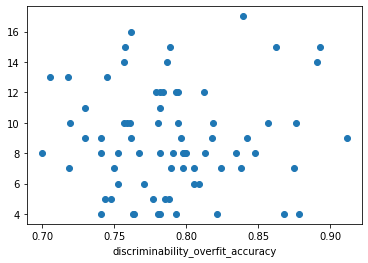

#### TESQ_E_goal_deliberation

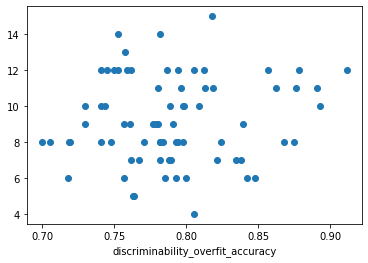

#### TESQ_E_controlling_temptations

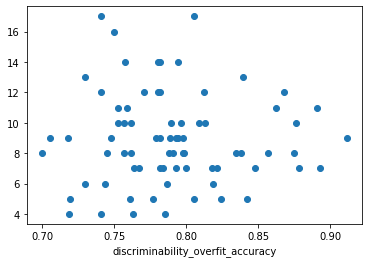

#### TESQ_E_distraction

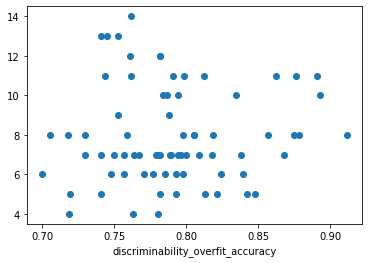

#### TESQ_E_goal_and_rule_setting

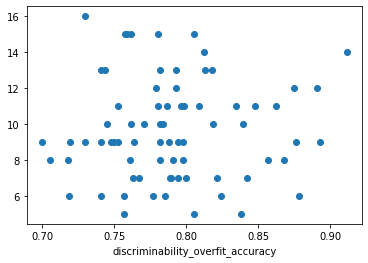

### discriminability_mean_cv_scores

#### SST_SSRT

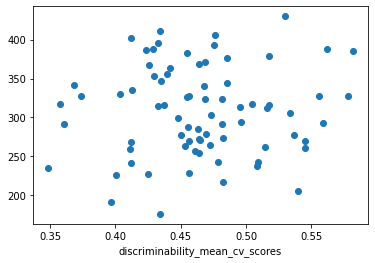

#### TESQ_E_suppression

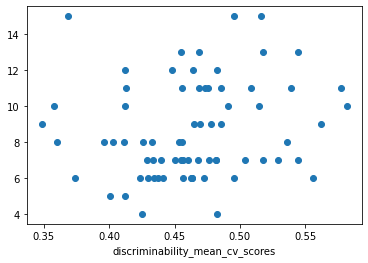

#### TESQ_E_avoidance_of_temptations

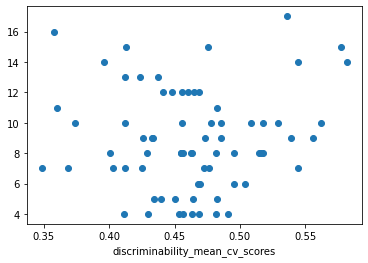

#### TESQ_E_goal_deliberation

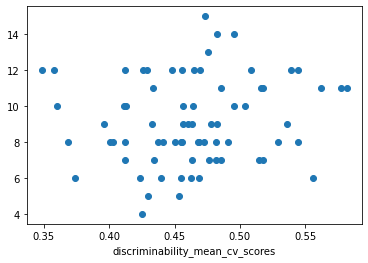

#### TESQ_E_controlling_temptations

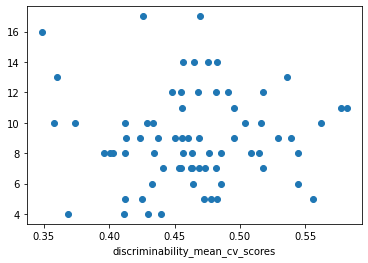

#### TESQ_E_distraction

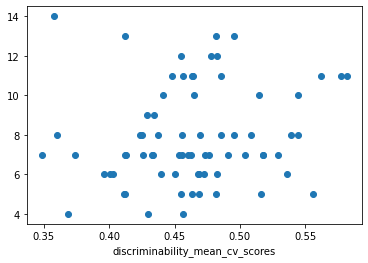

#### TESQ_E_goal_and_rule_setting

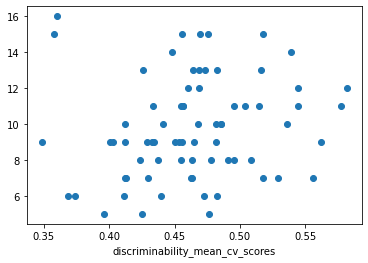

## harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars triangularis

### discriminability_overfit_accuracy

#### SST_SSRT

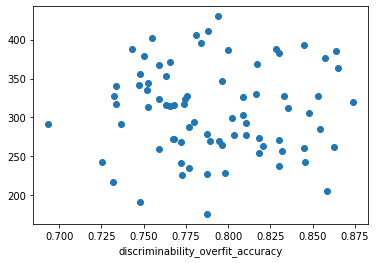

#### TESQ_E_suppression

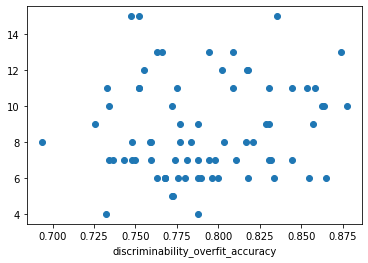

#### TESQ_E_avoidance_of_temptations

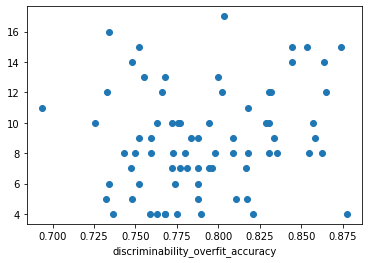

#### TESQ_E_goal_deliberation

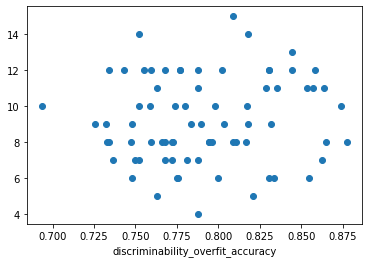

#### TESQ_E_controlling_temptations

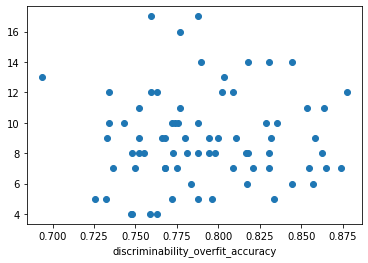

#### TESQ_E_distraction

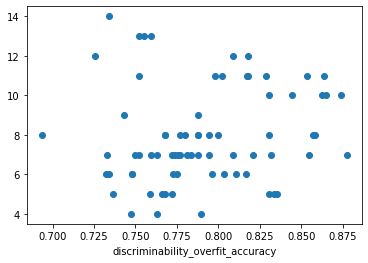

#### TESQ_E_goal_and_rule_setting

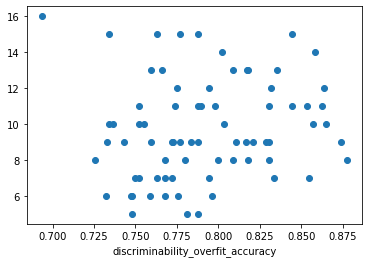

### discriminability_mean_cv_scores

#### SST_SSRT

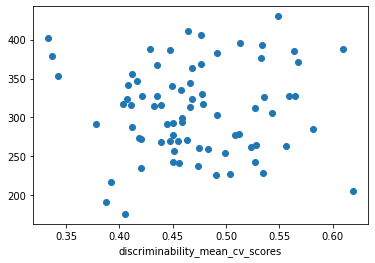

#### TESQ_E_suppression

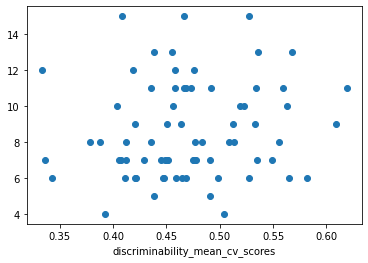

#### TESQ_E_avoidance_of_temptations

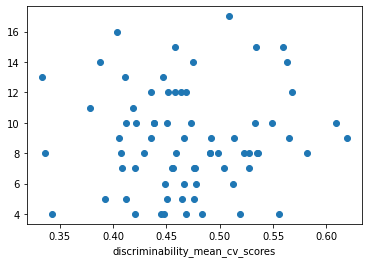

#### TESQ_E_goal_deliberation

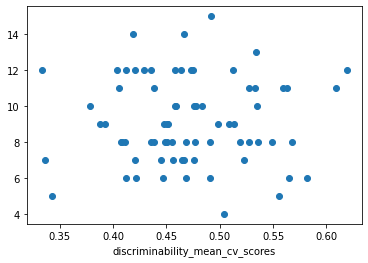

#### TESQ_E_controlling_temptations

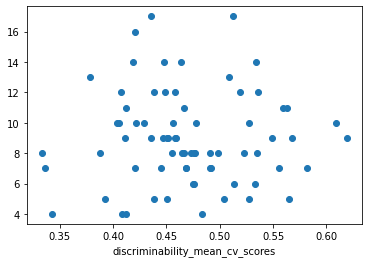

#### TESQ_E_distraction

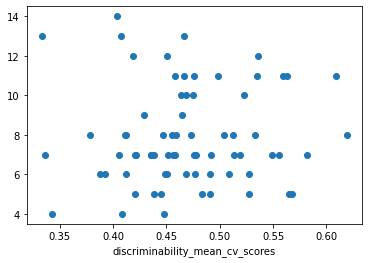

#### TESQ_E_goal_and_rule_setting

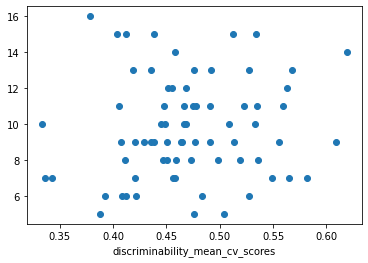

## harvardoxford-cortical_prob_Insular Cortex

### discriminability_overfit_accuracy

#### SST_SSRT

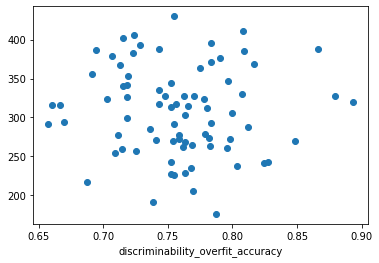

#### TESQ_E_suppression

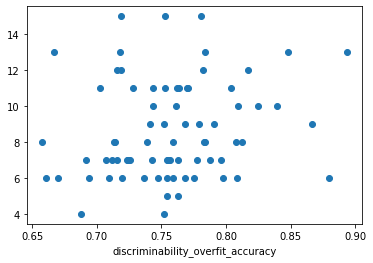

#### TESQ_E_avoidance_of_temptations

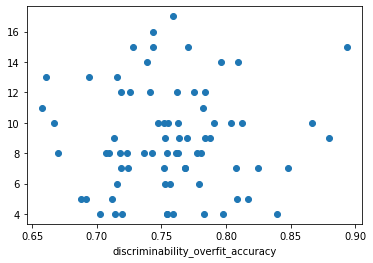

#### TESQ_E_goal_deliberation

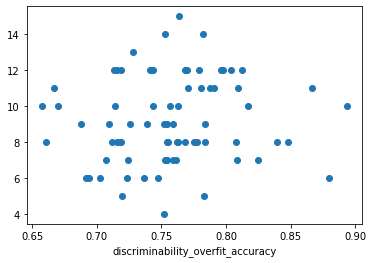

#### TESQ_E_controlling_temptations

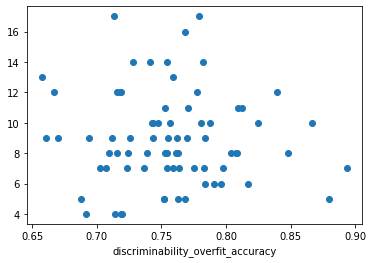

#### TESQ_E_distraction

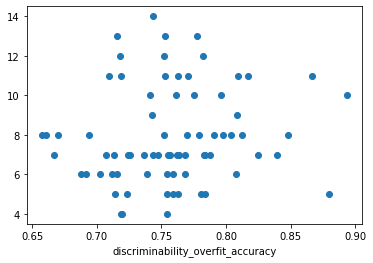

#### TESQ_E_goal_and_rule_setting

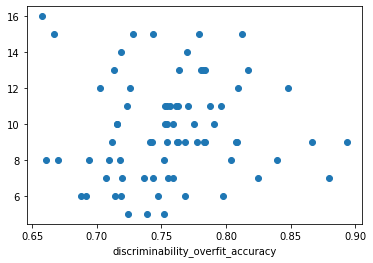

### discriminability_mean_cv_scores

#### SST_SSRT

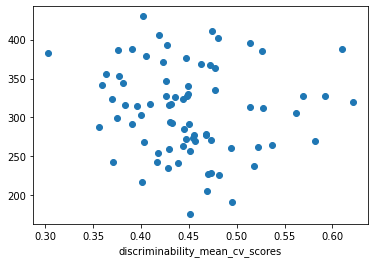

#### TESQ_E_suppression

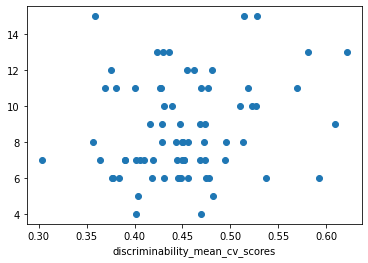

#### TESQ_E_avoidance_of_temptations

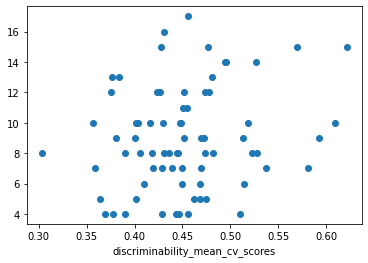

#### TESQ_E_goal_deliberation

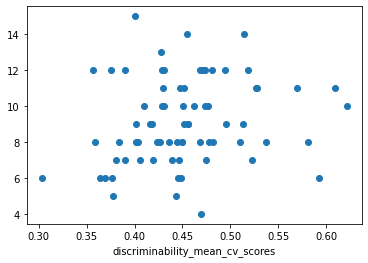

#### TESQ_E_controlling_temptations

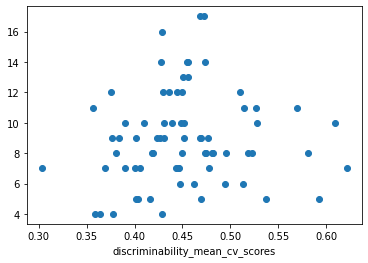

#### TESQ_E_distraction

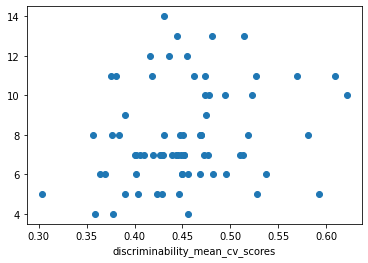

#### TESQ_E_goal_and_rule_setting

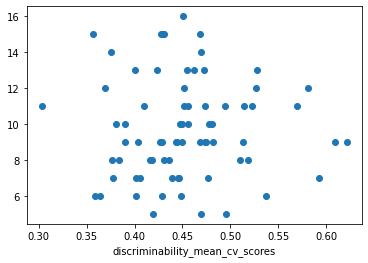

In [12]:
summary_across_mask_list = []
for mask_filepath in mask_list:

    mask_filename = os.path.basename(mask_filepath)
    mask_name = mask_filename.split(".")[0]
    
    display(Markdown("## " + mask_name))
    masked_analysis_filepath = (ml_data_folderpath + "/SST/discriminability_by_mask_" + 
        discriminability_version_id + "_" + mask_name + ".pkl")
        
    #go on to the next one if it doesn't exist
    if os.path.exists(masked_analysis_filepath)==False:
        print ("warning: " + masked_analysis_filepath + " does not exist.")
        continue
        
    with open(masked_analysis_filepath, 'rb') as handle:
        summary_results = pickle.load(handle)
        
    summary_results2 = summary_results.rename(columns={
        'mean_cv_scores':'discriminability_mean_cv_scores',
        'overfit_accuracy':'discriminability_overfit_accuracy'})
    
    ind_div_combined = summary_results2.merge(individual_differences)
    
    ind_div_combined_3sd = remove_selected_outliers_tesq_study(
        ind_div_combined,
        show_plot=False)
    
    tabular_summary = display_discriminability_correlations_tesq(ind_div_combined_3sd)
    
    tabular_summary['mask_name']=mask_name
    
    summary_across_mask_list = summary_across_mask_list + [tabular_summary]
    
    
summary_across_masks = pd.concat(summary_across_mask_list)
    

    

In [13]:
summary_across_masks.columns

Index(['neural_var', 'correlate', 'pearson's r', 'pearson's r p-value',
       'spearman's rho', 'spearman's rho p-value', 'mask_name'],
      dtype='object')

In [14]:
pd.set_option('display.max_rows', 200)

In [15]:
np.unique(summary_across_masks.correlate)

array(['SST_SSRT', 'TESQ_E_avoidance_of_temptations',
       'TESQ_E_controlling_temptations', 'TESQ_E_distraction',
       'TESQ_E_goal_and_rule_setting', 'TESQ_E_goal_deliberation',
       'TESQ_E_suppression'], dtype=object)

In [16]:
summary_across_masks_cv = summary_across_masks.loc[summary_across_masks['neural_var']=='discriminability_mean_cv_scores'].copy()

In [17]:
fdr_corrected = fdrcorrection(summary_across_masks_cv["pearson's r p-value"],alpha=0.05)
summary_across_masks_cv["pearson's r p-value fdr-cor"] = fdr_corrected[1]

In [18]:
summary_across_masks_cv.shape

(105, 8)

In [19]:
summary_across_masks_cv.loc[:,
                            ['correlate', "pearson's r", "pearson's r p-value","pearson's r p-value fdr-cor",
                             'mask_name']
                        ].sort_values("pearson's r p-value")

correlate  pearson's r  pearson's r p-value  \
10         TESQ_E_goal_deliberation     0.439946             0.000098   
13     TESQ_E_goal_and_rule_setting     0.376222             0.001037   
12               TESQ_E_distraction     0.364574             0.001641   
12               TESQ_E_distraction     0.361617             0.001802   
12               TESQ_E_distraction     0.316775             0.006706   
10         TESQ_E_goal_deliberation     0.307455             0.008145   
8                TESQ_E_suppression     0.288040             0.014145   
13     TESQ_E_goal_and_rule_setting     0.282614             0.015410   
10         TESQ_E_goal_deliberation     0.275495             0.017514   
13     TESQ_E_goal_and_rule_setting     0.267109             0.021413   
8                TESQ_E_suppression     0.257061             0.028131   
12               TESQ_E_distraction     0.255214             0.031713   
13     TESQ_E_goal_and_rule_setting     0.244863             0.039583   
12               TESQ_E_distraction     0.237120             0.044908   
10         TESQ_E_goal_deliberation     0.234929             0.046984   
10         TESQ_E_goal_deliberation     0.232883             0.047394   
7                          SST_SSRT     0.228451             0.048682   
8                TESQ_E_suppression     0.224189             0.056551   
12               TESQ_E_distraction     0.223398             0.057452   
8                TESQ_E_suppression     0.220755             0.060545   
11   TESQ_E_controlling_temptations     0.217532             0.064498   
11   TESQ_E_controlling_temptations     0.211137             0.075022   
8                TESQ_E_suppression     0.203616             0.084020   
12               TESQ_E_distraction     0.204648             0.086905   
8                TESQ_E_suppression     0.198676             0.091983   
9   TESQ_E_avoidance_of_temptations     0.197373             0.094179   
12               TESQ_E_distraction     0.194449             0.101685   
10         TESQ_E_goal_deliberation     0.192064             0.103554   
13     TESQ_E_goal_and_rule_setting     0.188969             0.109344   
10         TESQ_E_goal_deliberation     0.188163             0.110894   
13     TESQ_E_goal_and_rule_setting     0.185543             0.116044   
8                TESQ_E_suppression     0.185464             0.116201   
9   TESQ_E_avoidance_of_temptations     0.182406             0.122452   
10         TESQ_E_goal_deliberation     0.181385             0.124594   
12               TESQ_E_distraction     0.179789             0.130736   
7                          SST_SSRT    -0.173519             0.131250   
13     TESQ_E_goal_and_rule_setting     0.173766             0.141497   
8                TESQ_E_suppression     0.171378             0.150034   
8                TESQ_E_suppression     0.169417             0.151888   
13     TESQ_E_goal_and_rule_setting     0.166401             0.162410   
11   TESQ_E_controlling_temptations     0.161276             0.172851   
8                TESQ_E_suppression     0.159045             0.182061   
13     TESQ_E_goal_and_rule_setting     0.158622             0.183241   
12               TESQ_E_distraction     0.155109             0.196493   
7                          SST_SSRT     0.142081             0.217715   
8                TESQ_E_suppression     0.143376             0.222966   
9   TESQ_E_avoidance_of_temptations     0.139290             0.239877   
7                          SST_SSRT    -0.133322             0.247709   
10         TESQ_E_goal_deliberation     0.136475             0.249605   
8                TESQ_E_suppression     0.134499             0.259989   
10         TESQ_E_goal_deliberation     0.131879             0.269472   
11   TESQ_E_controlling_temptations     0.124662             0.300284   
9   TESQ_E_avoidance_of_temptations     0.115607             0.333527   
9   TESQ_E_avoidance_of_temptations     0.109050             0.358416   
13     TESQ

In [20]:
summary_across_masks_overfit = summary_across_masks.loc[summary_across_masks['neural_var']=='discriminability_overfit_accuracy'].copy()
summary_across_masks_overfit["pearson's r p-value fdr-cor"] = fdrcorrection(summary_across_masks_overfit["pearson's r p-value"],alpha=0.05)[1]

In [21]:
summary_across_masks_overfit[
                         ['correlate', "pearson's r", "pearson's r p-value","pearson's r p-value fdr-cor", 'mask_name']
                        ].sort_values("pearson's r p-value")[0:30]

correlate  pearson's r  pearson's r p-value  \
5               TESQ_E_distraction     0.408082             0.000339   
3         TESQ_E_goal_deliberation     0.347904             0.002387   
3         TESQ_E_goal_deliberation     0.294416             0.010889   
5               TESQ_E_distraction     0.291652             0.012295   
1               TESQ_E_suppression     0.272804             0.018693   
4   TESQ_E_controlling_temptations    -0.255430             0.028059   
2  TESQ_E_avoidance_of_temptations    -0.234310             0.046014   
1               TESQ_E_suppression     0.222842             0.056340   
1               TESQ_E_suppression     0.221137             0.056571   
6     TESQ_E_goal_and_rule_setting     0.206833             0.075002   
5               TESQ_E_distraction     0.198824             0.089464   
6     TESQ_E_goal_and_rule_setting     0.194182             0.095048   
2  TESQ_E_avoidance_of_temptations     0.194041             0.097606   
4   TESQ_E_controlling_temptations    -0.192184             0.103334   
1               TESQ_E_suppression     0.188528             0.107696   
1               TESQ_E_suppression     0.184677             0.115214   
2  TESQ_E_avoidance_of_temptations     0.184347             0.115875   
3         TESQ_E_goal_deliberation     0.182897             0.116272   
1               TESQ_E_suppression     0.179410             0.126138   
5               TESQ_E_distraction    -0.180741             0.128677   
1               TESQ_E_suppression     0.175878             0.133897   
0                         SST_SSRT    -0.171586             0.135667   
0                         SST_SSRT     0.162887             0.154189   
3         TESQ_E_goal_deliberation     0.163320             0.164418   
5               TESQ_E_distraction     0.160390             0.175252   
1               TESQ_E_suppression     0.153128             0.202342   
0                         SST_SSRT     0.143175             0.208110   
4   TESQ_E_controlling_temptations    -0.145730             0.215382   
3         TESQ_E_goal_deliberation    -0.142765             0.234951   
5               TESQ_E_distraction     0.140608             0.235414   

   pearson's r p-value fdr-cor  \
5                     0.035551   
3                     0.125311   
3                     0.322754   
5                     0.322754   
1                     0.392562   
4                     0.491039   
2                     0.647501   
1                     0.647501   
1                     0.647501   
6                     0.647501   
5                     0.647501   
6                     0.647501   
2                     0.647501   
4                     0.647501   
1                     0.647501   
1                     0.647501   
2                     0.647501   
3                     0.647501   
1                     0.647501   
5                     0.647501   
1                     0.647501   
0                     0.647501   
0                     0.703907   
3                     0.719330   
5                     0.736060   
1                     0.778232   
0                     0.778232   
4                     0.778232   
3                     0.778232   
5                     0.778232   

                                           mask_name  
5         negative emotions_association-test_z_FDR_0  
3         negative emotions_association-test_z_FDR_0  
3  harvardoxford-cortical_prob_Frontal Operculum ...  
5  harvardoxford-cortical_prob_Frontal Operculum ...  
1  harvardoxford-cortical_prob_Frontal Operculum ...  
4  harvardoxford-cortical_prob_Superior Frontal G...  
2           harvardoxford-cortical_prob_Frontal Pole  
1         negative emotions_association-test_z_FDR_0  
1           negative affect_association-test_z_FDR_0  
6           negative affect_association-test_z_FDR_0  
5       response inhibition_association-test_z_FDR_0  
6       response inhibition_association-test_z_FDR_0  
2         negative emo

Two things:
    
 - the 'negative affect' or negative emotion value is strong and I should be fairly confident it's a real effect. Perhaps we do a sensitivity analysis with it but we can take it to the bank, so to speak.
 - discriminability mean CV score if anything picks up more associations. That means we should probably focus on improving our CV method, by going to something closer to 10-fold than the 2-fold we're currently doing. Perhaps even stratifie k-fold where k is the number of the less numerous class.
 - these harvardoxford masks are crap. Options might be:
     - smaller levels of parcellation anatomical
     - searchlight of some kind?
     - multiplicative with the neurosynth mask
     - make them more selective by dialing up the coverage to e.g. 30 or so from current 10

### RTFS/PES

In [22]:
discriminability_version_id="pscg_v_1"

In [27]:
from analyze_results import get_ind_div_for_pes_combined

In [28]:
def display_discriminability_correlations_rtfs(ind_div_combined_3sd):
    return(display_discriminability_correlations(
        ind_div_combined_3sd,
        neural_vars = ['discriminability_overfit_accuracy','discriminability_mean_cv_scores'],
        correlations = [
        'RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2',
        'SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
        'cancer_promoting_FFQ','cancer_preventing_FFQ']
    ))
           
def remove_selected_outliers_rtfs_study(ind_div_combined,show_plot=False):
    
    idc_outliers_removed = remove_selected_outliers(ind_div_combined,
    ['discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
     
     'RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2',
        'SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
        'cancer_promoting_FFQ','cancer_preventing_FFQ'
    ],
    show_plot=False)
    return(idc_outliers_removed)



## negative affect_association-test_z_FDR_0

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

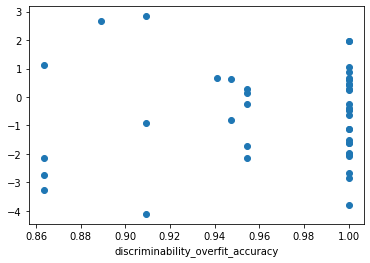

#### RTFS_factor_1

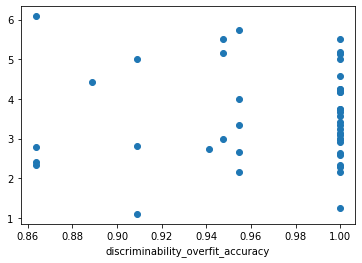

#### RTFS_factor_2

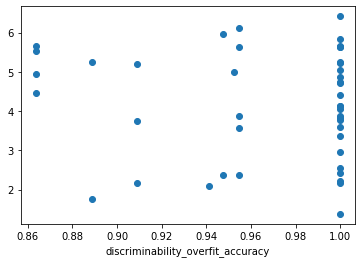

#### SST_SSRT

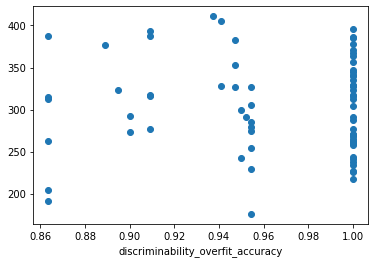

#### pes_mean_limited

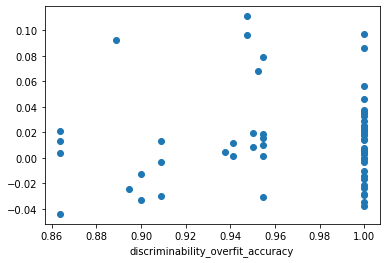

#### PostErrorSlowW1

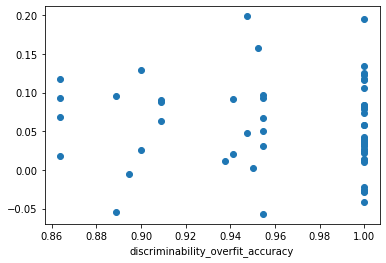

#### cancer_promoting_minus_preventing_FFQ

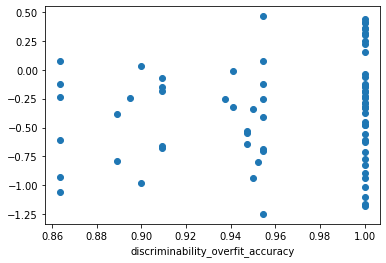

#### cancer_promoting_FFQ

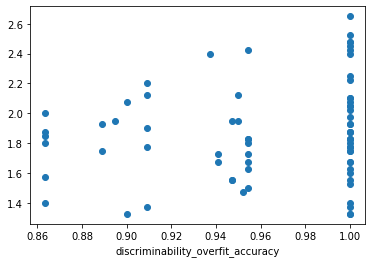

#### cancer_preventing_FFQ

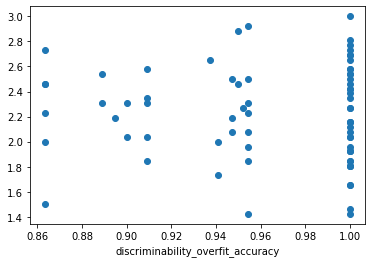

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

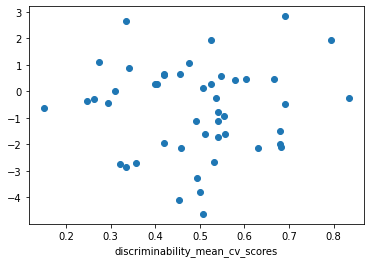

#### RTFS_factor_1

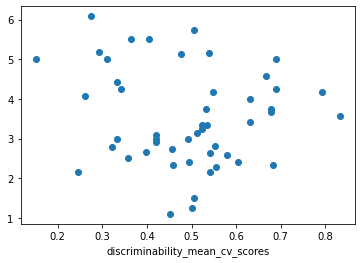

#### RTFS_factor_2

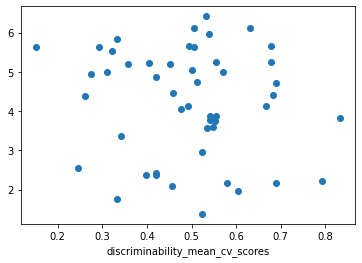

#### SST_SSRT

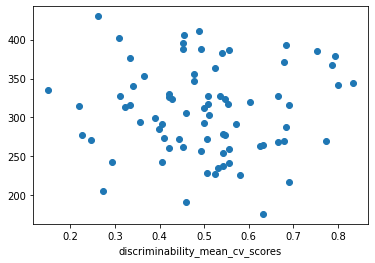

#### pes_mean_limited

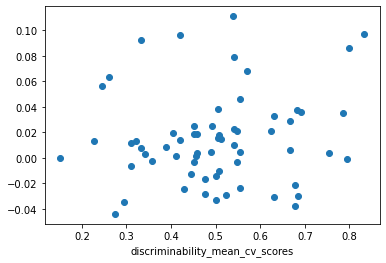

#### PostErrorSlowW1

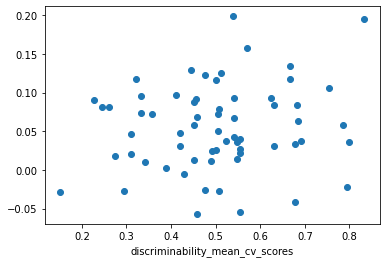

#### cancer_promoting_minus_preventing_FFQ

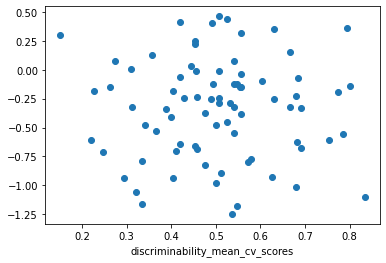

#### cancer_promoting_FFQ

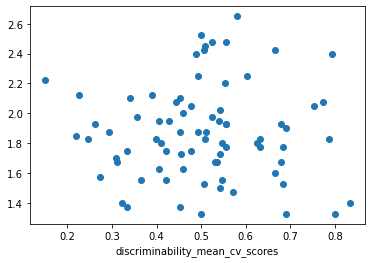

#### cancer_preventing_FFQ

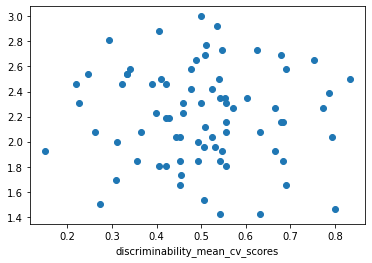

## response inhibition_association-test_z_FDR_0

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

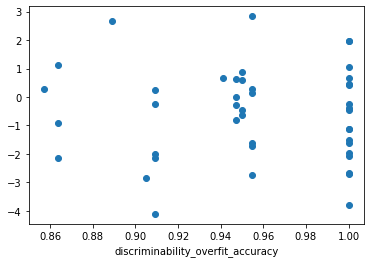

#### RTFS_factor_1

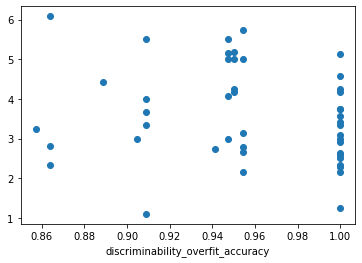

#### RTFS_factor_2

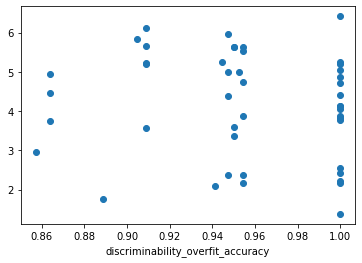

#### SST_SSRT

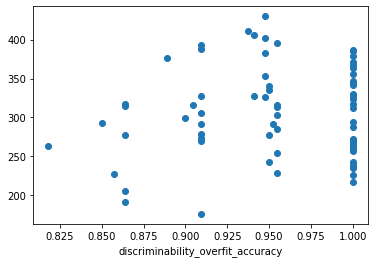

#### pes_mean_limited

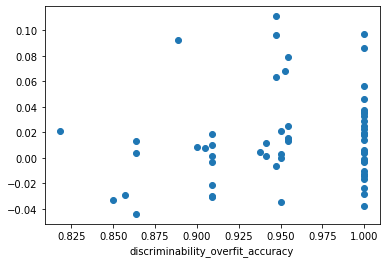

#### PostErrorSlowW1

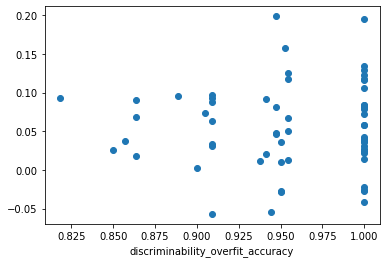

#### cancer_promoting_minus_preventing_FFQ

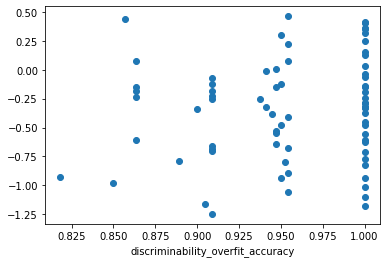

#### cancer_promoting_FFQ

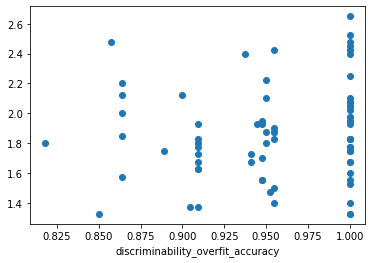

#### cancer_preventing_FFQ

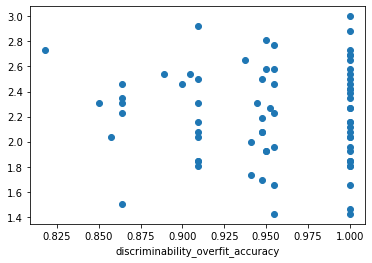

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

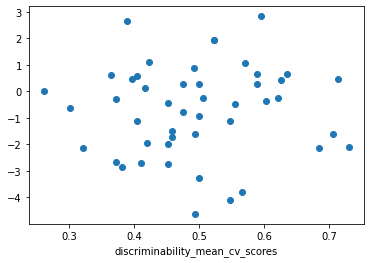

#### RTFS_factor_1

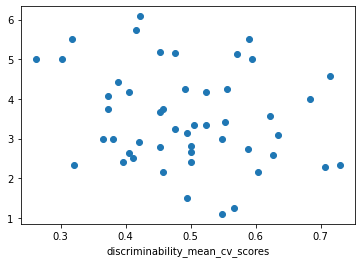

#### RTFS_factor_2

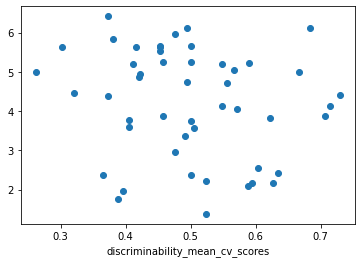

#### SST_SSRT

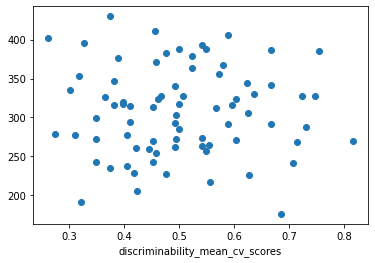

#### pes_mean_limited

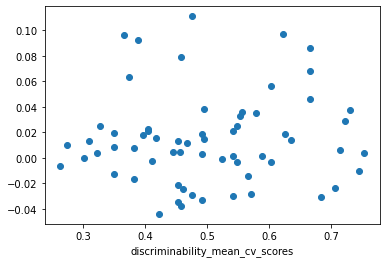

#### PostErrorSlowW1

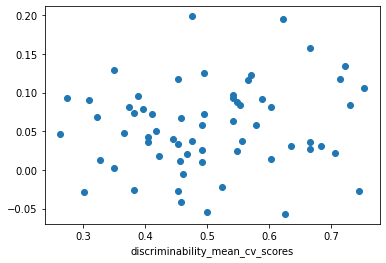

#### cancer_promoting_minus_preventing_FFQ

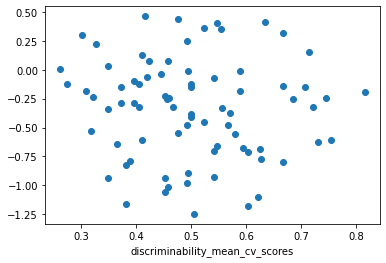

#### cancer_promoting_FFQ

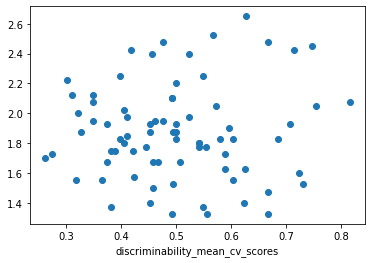

#### cancer_preventing_FFQ

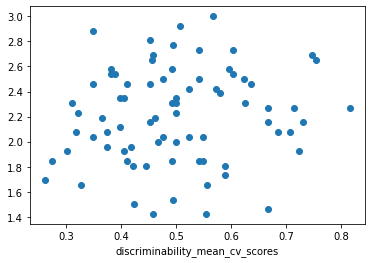

## negative emotions_association-test_z_FDR_0

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

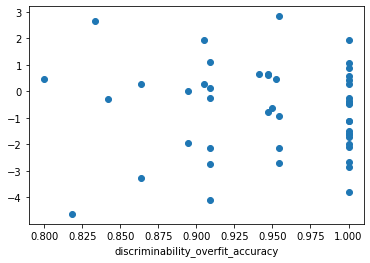

#### RTFS_factor_1

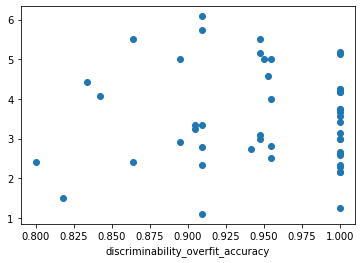

#### RTFS_factor_2

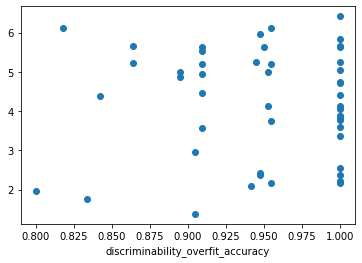

#### SST_SSRT

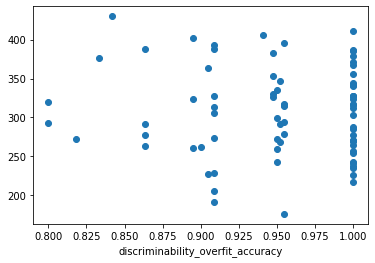

#### pes_mean_limited

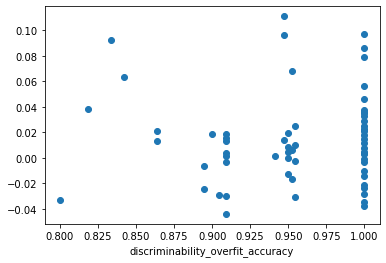

#### PostErrorSlowW1

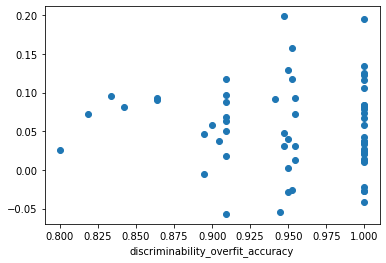

#### cancer_promoting_minus_preventing_FFQ

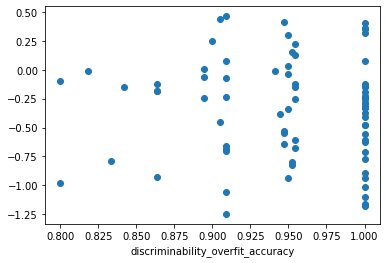

#### cancer_promoting_FFQ

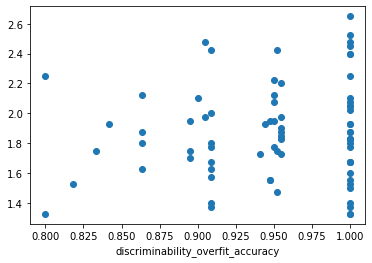

#### cancer_preventing_FFQ

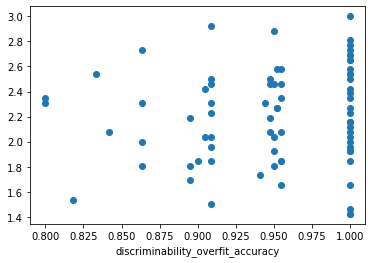

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

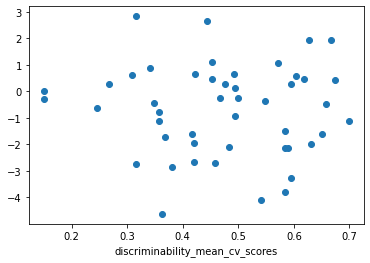

#### RTFS_factor_1

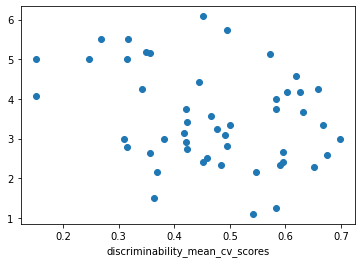

#### RTFS_factor_2

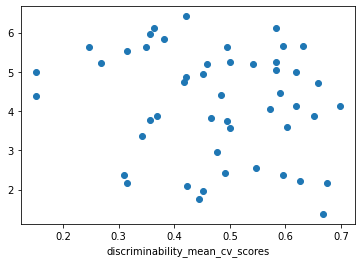

#### SST_SSRT

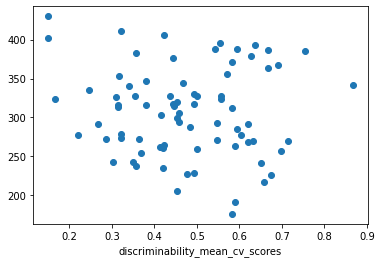

#### pes_mean_limited

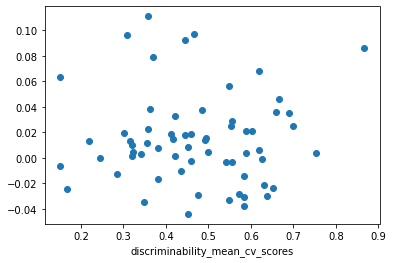

#### PostErrorSlowW1

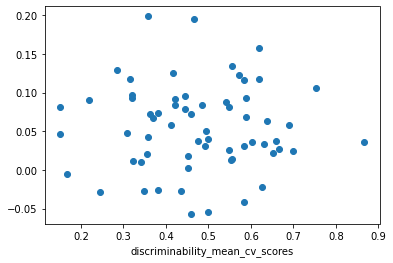

#### cancer_promoting_minus_preventing_FFQ

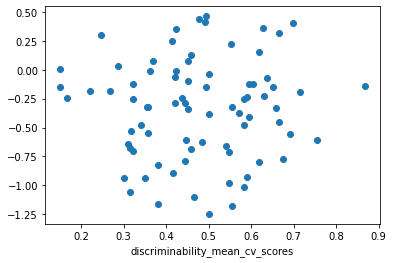

#### cancer_promoting_FFQ

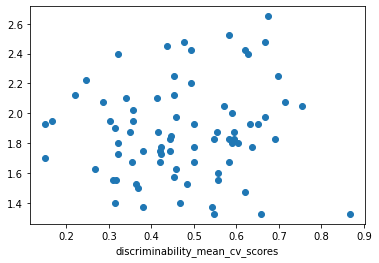

#### cancer_preventing_FFQ

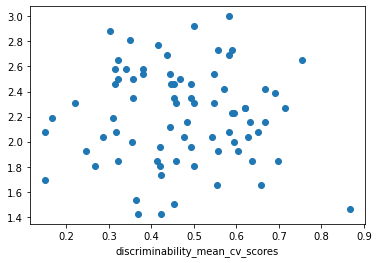

## harvardoxford-cortical_prob_Superior Frontal Gyrus

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

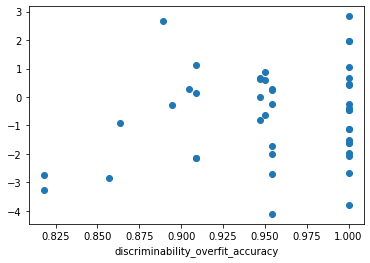

#### RTFS_factor_1

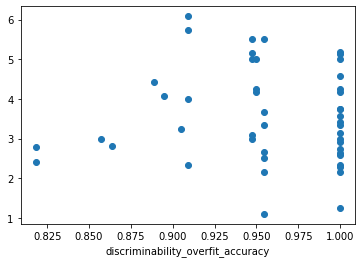

#### RTFS_factor_2

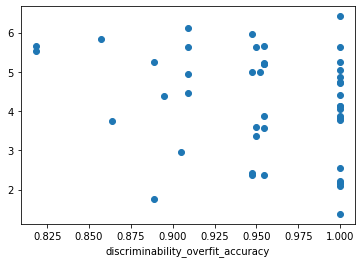

#### SST_SSRT

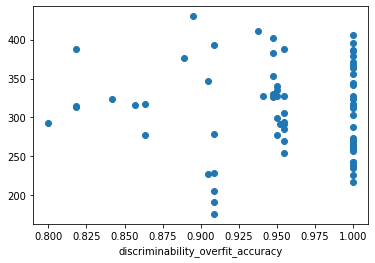

#### pes_mean_limited

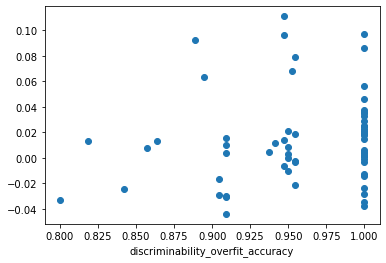

#### PostErrorSlowW1

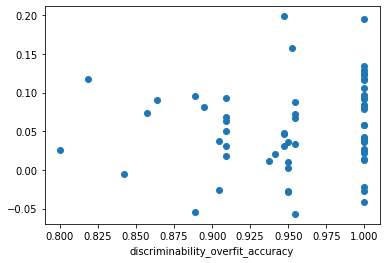

#### cancer_promoting_minus_preventing_FFQ

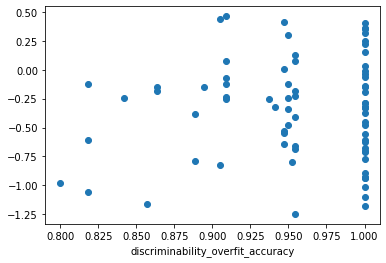

#### cancer_promoting_FFQ

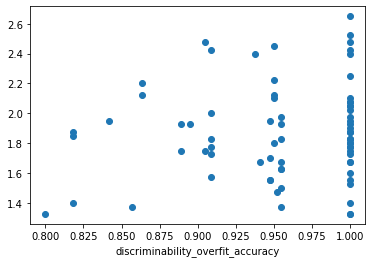

#### cancer_preventing_FFQ

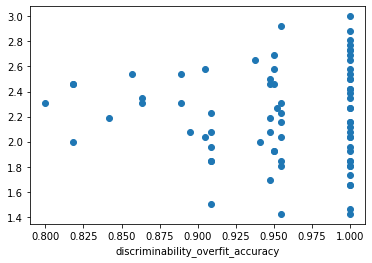

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

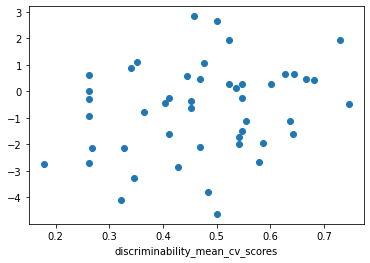

#### RTFS_factor_1

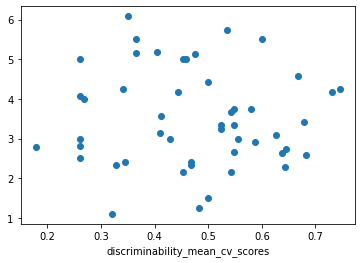

#### RTFS_factor_2

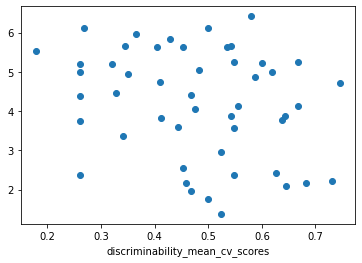

#### SST_SSRT

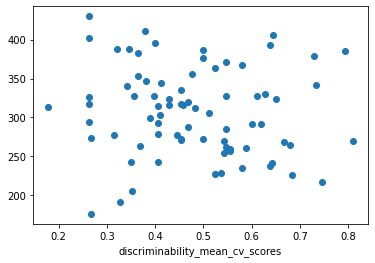

#### pes_mean_limited

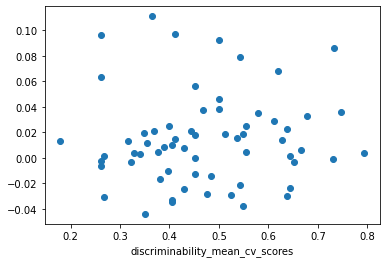

#### PostErrorSlowW1

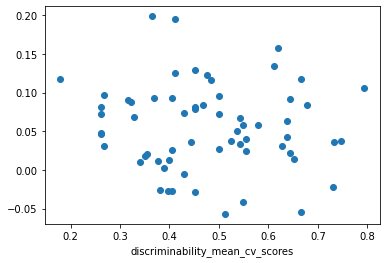

#### cancer_promoting_minus_preventing_FFQ

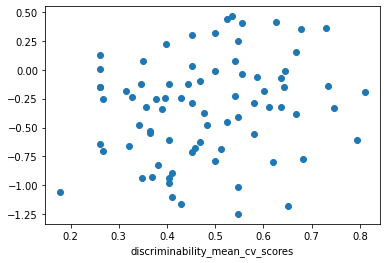

#### cancer_promoting_FFQ

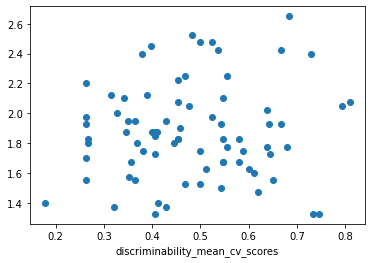

#### cancer_preventing_FFQ

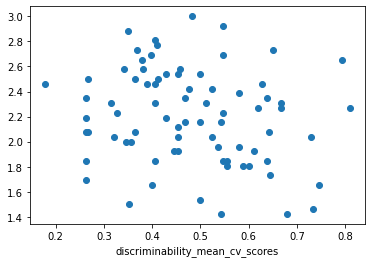

## harvardoxford-cortical_prob_Frontal Pole

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

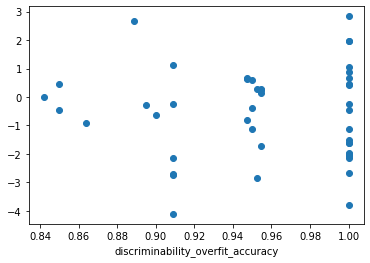

#### RTFS_factor_1

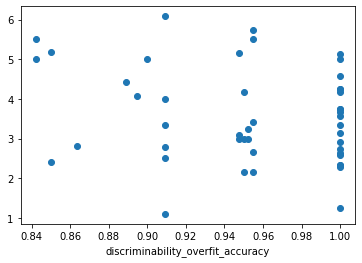

#### RTFS_factor_2

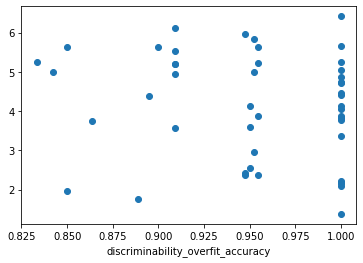

#### SST_SSRT

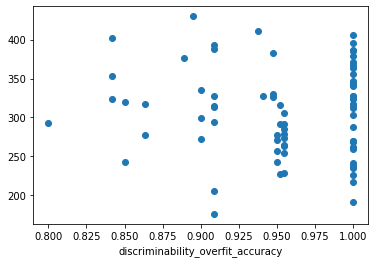

#### pes_mean_limited

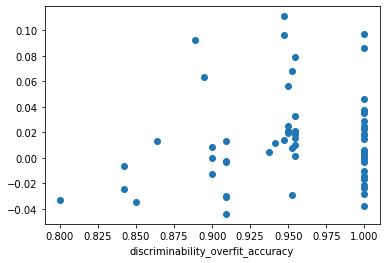

#### PostErrorSlowW1

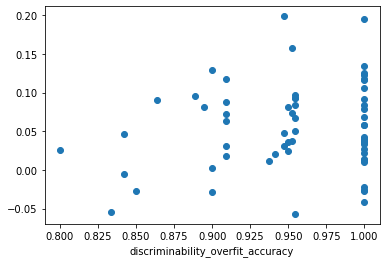

#### cancer_promoting_minus_preventing_FFQ

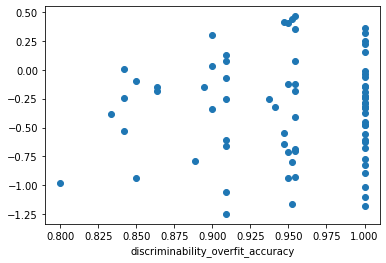

#### cancer_promoting_FFQ

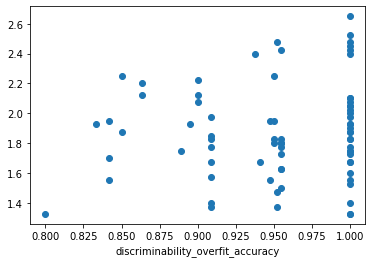

#### cancer_preventing_FFQ

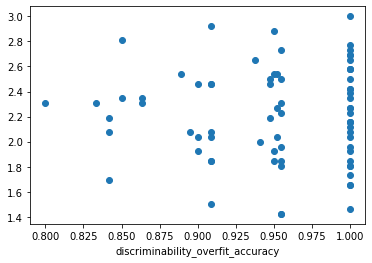

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

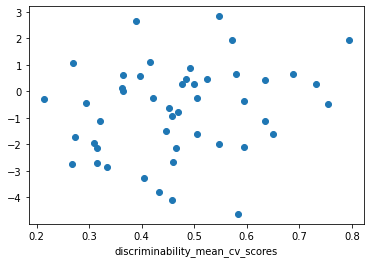

#### RTFS_factor_1

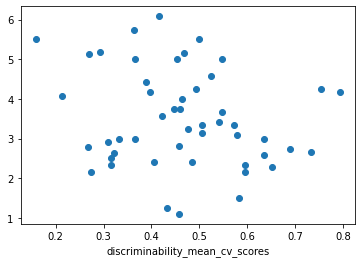

#### RTFS_factor_2

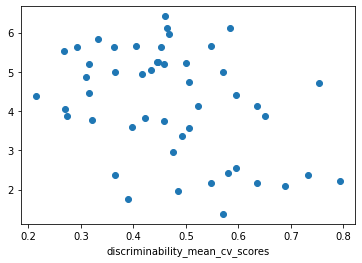

#### SST_SSRT

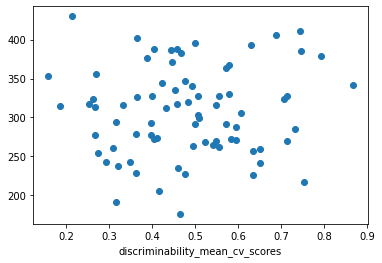

#### pes_mean_limited

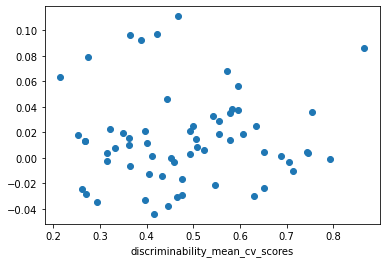

#### PostErrorSlowW1

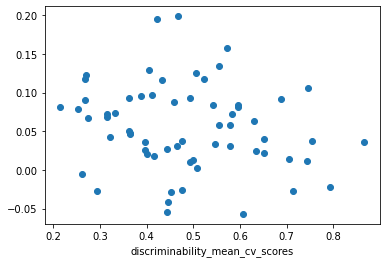

#### cancer_promoting_minus_preventing_FFQ

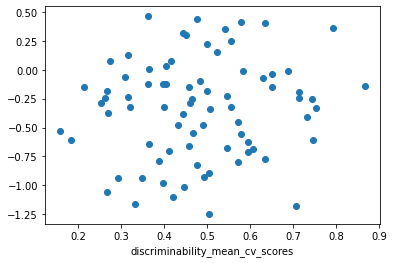

#### cancer_promoting_FFQ

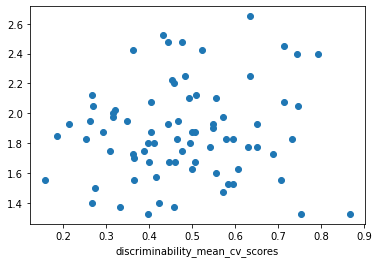

#### cancer_preventing_FFQ

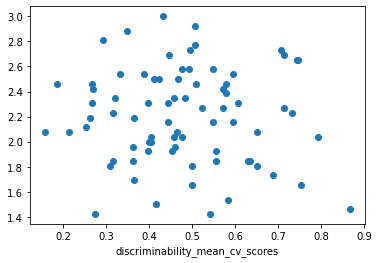

## harvardoxford-cortical_prob_Cingulate Gyrus, posterior division

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

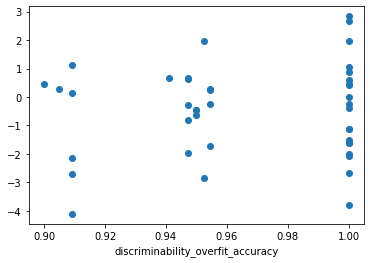

#### RTFS_factor_1

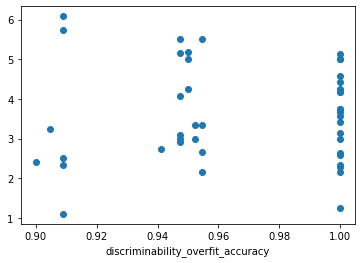

#### RTFS_factor_2

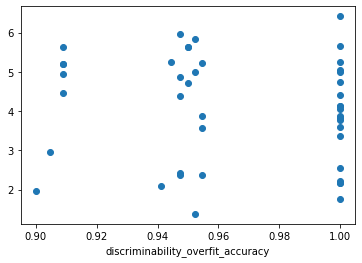

#### SST_SSRT

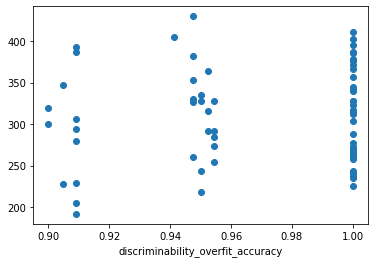

#### pes_mean_limited

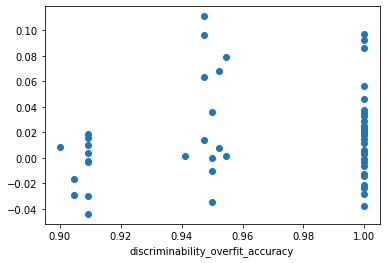

#### PostErrorSlowW1

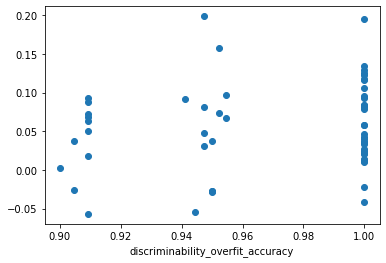

#### cancer_promoting_minus_preventing_FFQ

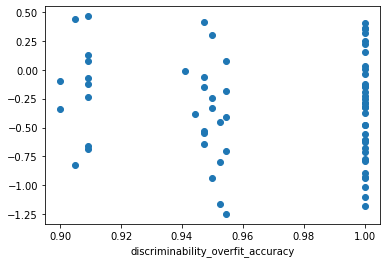

#### cancer_promoting_FFQ

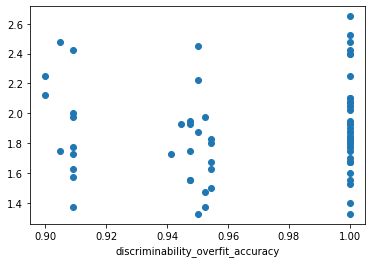

#### cancer_preventing_FFQ

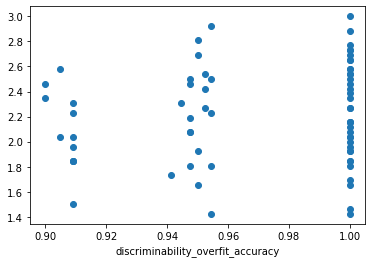

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

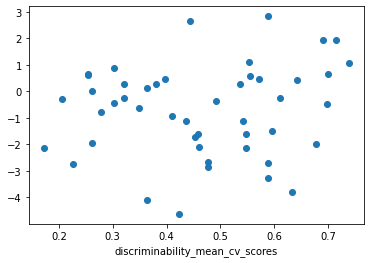

#### RTFS_factor_1

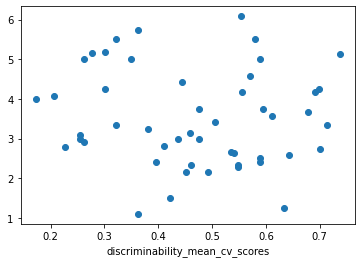

#### RTFS_factor_2

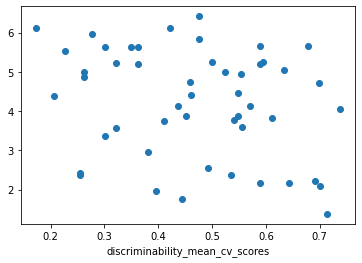

#### SST_SSRT

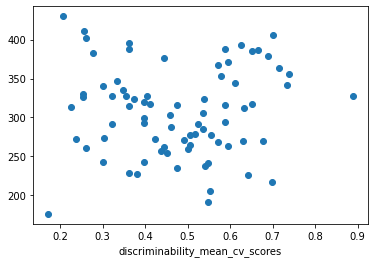

#### pes_mean_limited

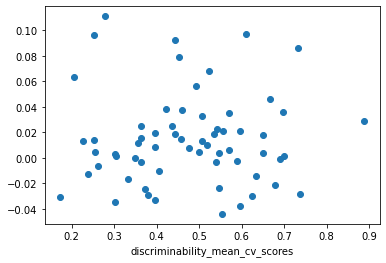

#### PostErrorSlowW1

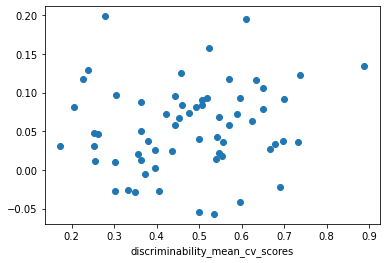

#### cancer_promoting_minus_preventing_FFQ

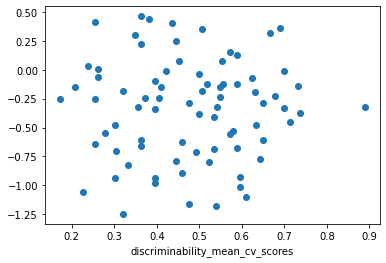

#### cancer_promoting_FFQ

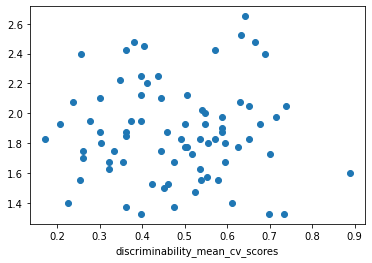

#### cancer_preventing_FFQ

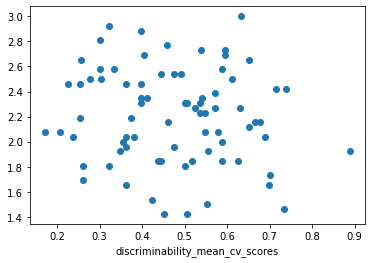

## harvardoxford-cortical_prob_Frontal Orbital Cortex

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

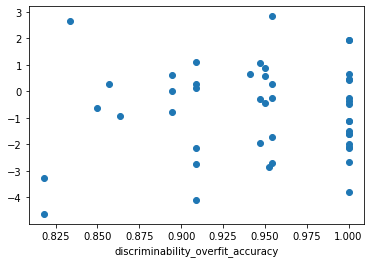

#### RTFS_factor_1

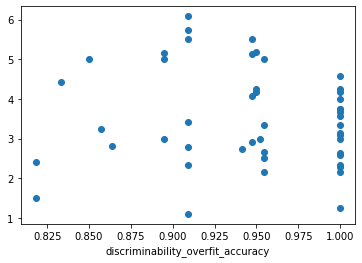

#### RTFS_factor_2

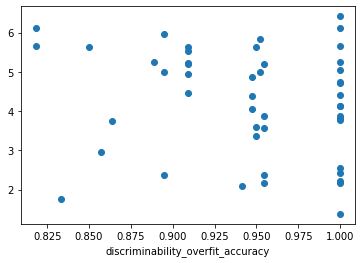

#### SST_SSRT

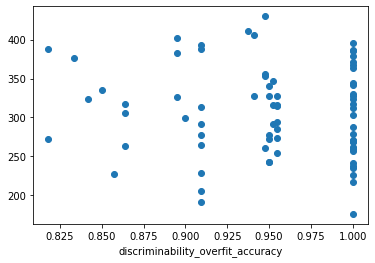

#### pes_mean_limited

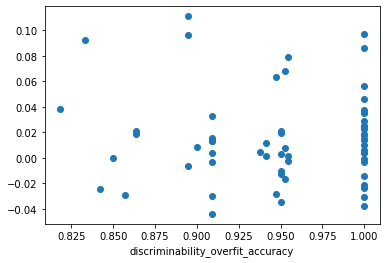

#### PostErrorSlowW1

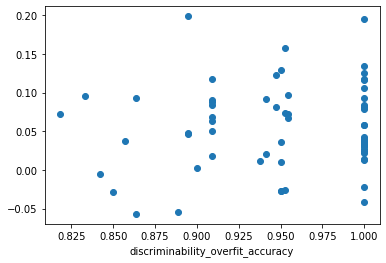

#### cancer_promoting_minus_preventing_FFQ

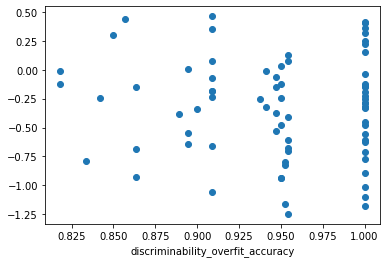

#### cancer_promoting_FFQ

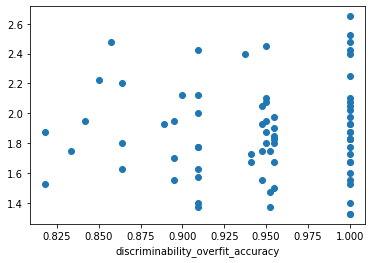

#### cancer_preventing_FFQ

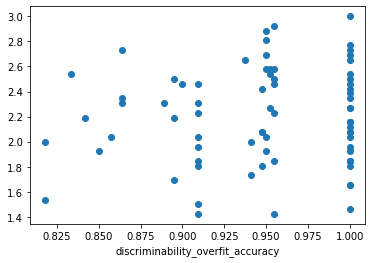

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

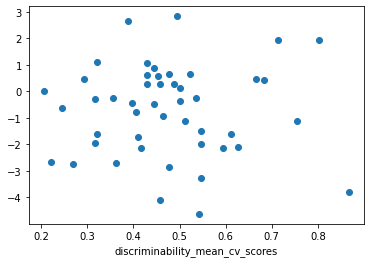

#### RTFS_factor_1

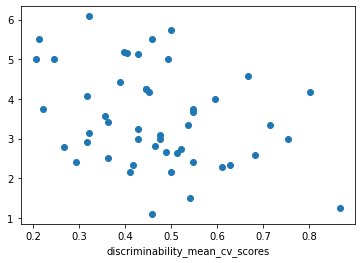

#### RTFS_factor_2

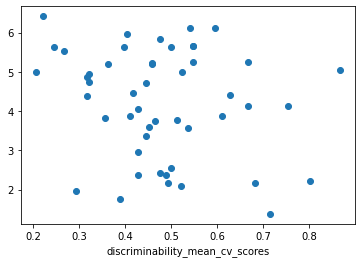

#### SST_SSRT

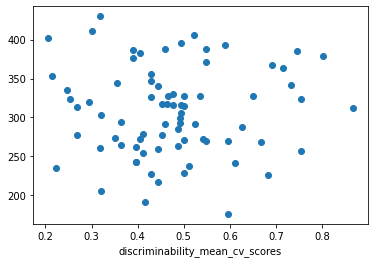

#### pes_mean_limited

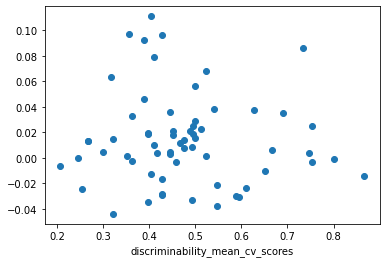

#### PostErrorSlowW1

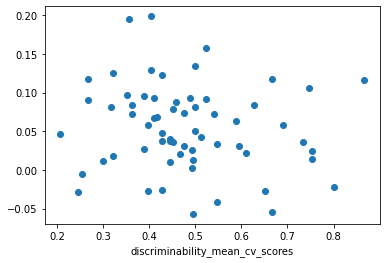

#### cancer_promoting_minus_preventing_FFQ

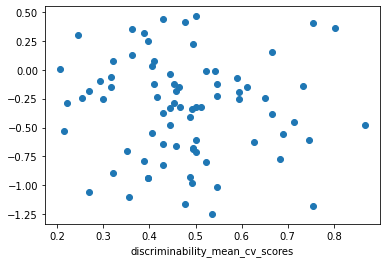

#### cancer_promoting_FFQ

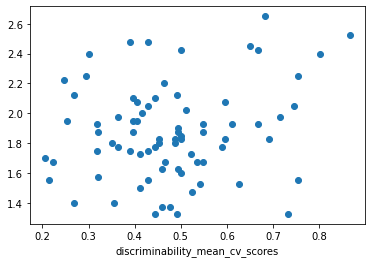

#### cancer_preventing_FFQ

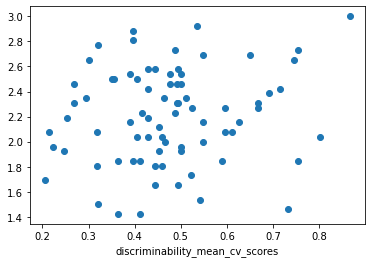

## harvardoxford-cortical_prob_Frontal Operculum Cortex

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

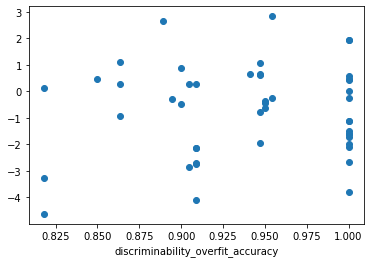

#### RTFS_factor_1

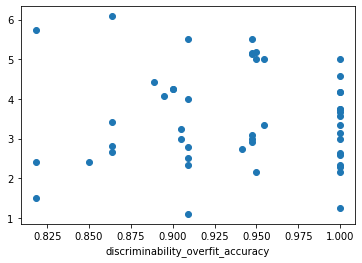

#### RTFS_factor_2

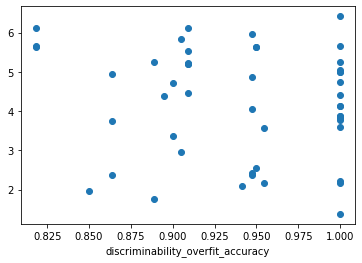

#### SST_SSRT

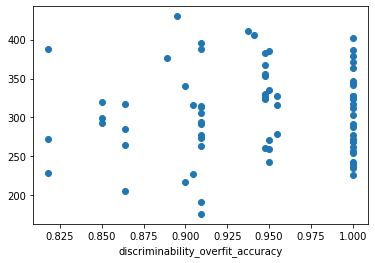

#### pes_mean_limited

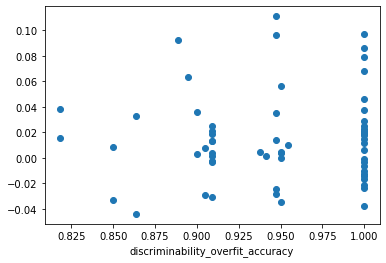

#### PostErrorSlowW1

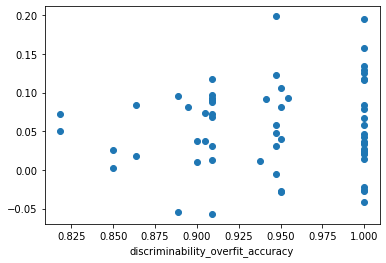

#### cancer_promoting_minus_preventing_FFQ

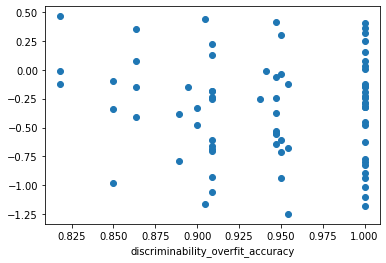

#### cancer_promoting_FFQ

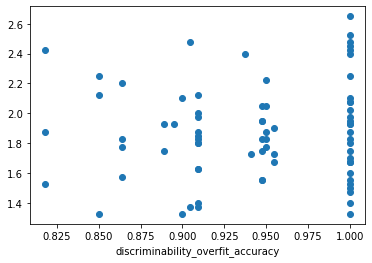

#### cancer_preventing_FFQ

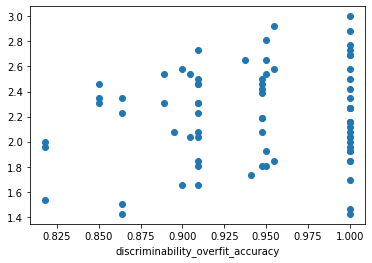

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

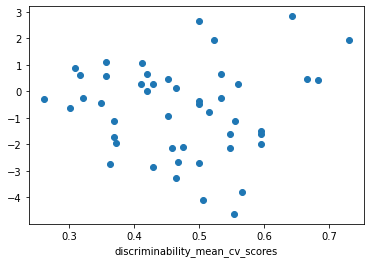

#### RTFS_factor_1

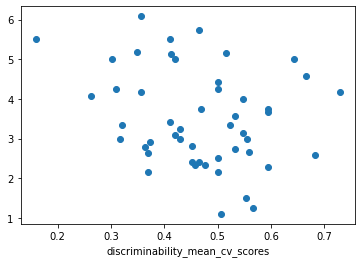

#### RTFS_factor_2

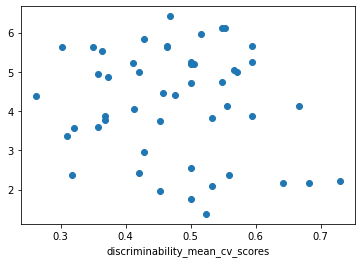

#### SST_SSRT

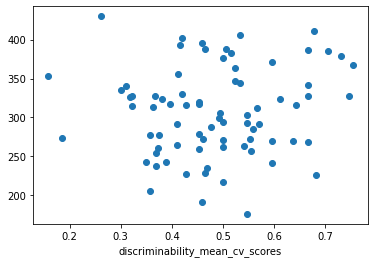

#### pes_mean_limited

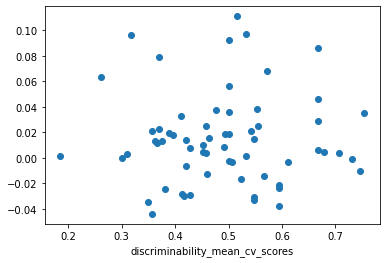

#### PostErrorSlowW1

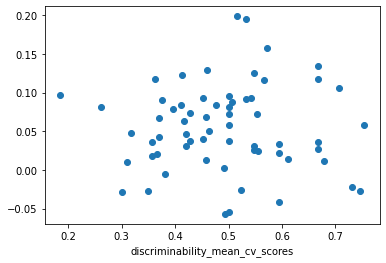

#### cancer_promoting_minus_preventing_FFQ

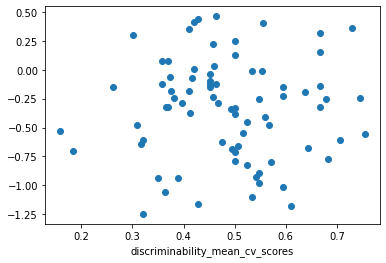

#### cancer_promoting_FFQ

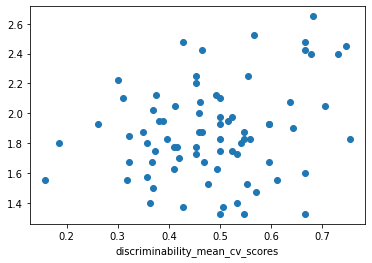

#### cancer_preventing_FFQ

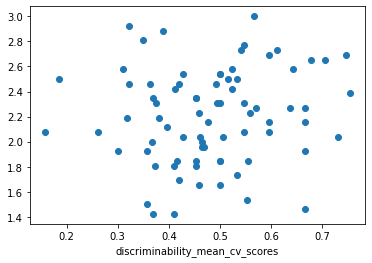

## harvardoxford-cortical_prob_Supramarginal Gyrus, posterior division

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

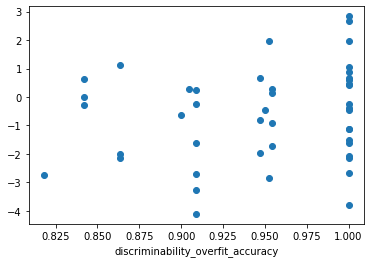

#### RTFS_factor_1

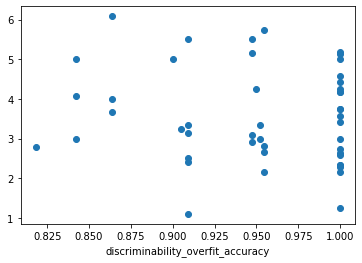

#### RTFS_factor_2

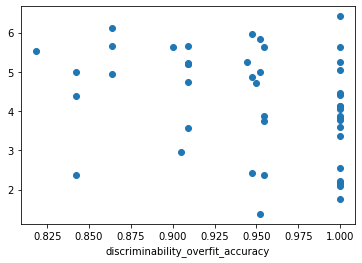

#### SST_SSRT

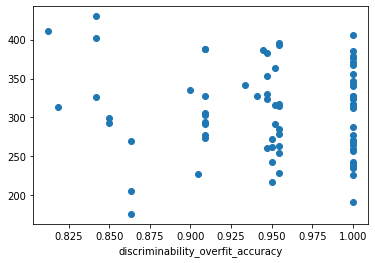

#### pes_mean_limited

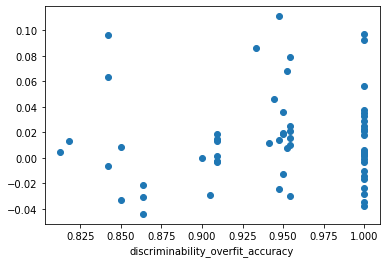

#### PostErrorSlowW1

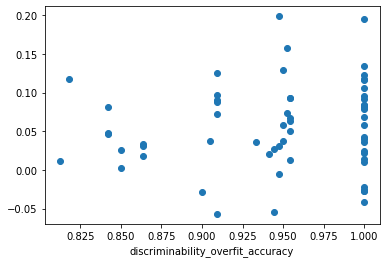

#### cancer_promoting_minus_preventing_FFQ

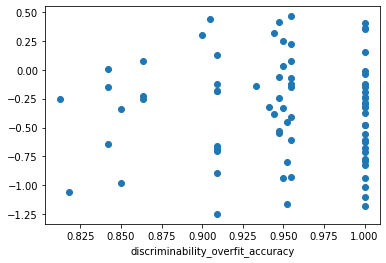

#### cancer_promoting_FFQ

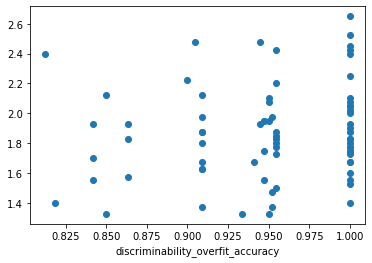

#### cancer_preventing_FFQ

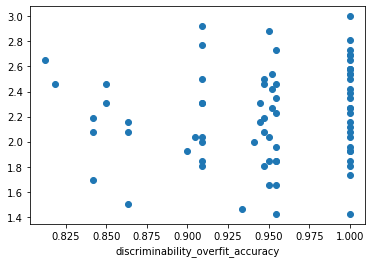

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

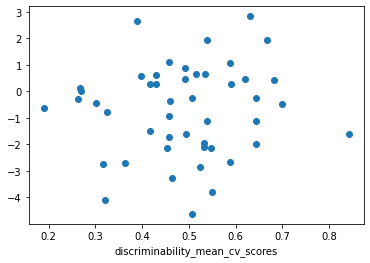

#### RTFS_factor_1

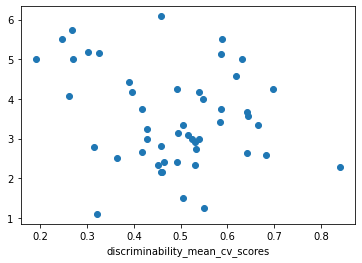

#### RTFS_factor_2

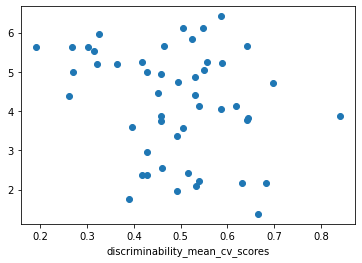

#### SST_SSRT

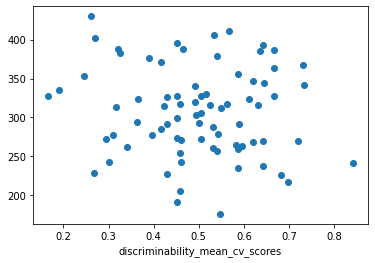

#### pes_mean_limited

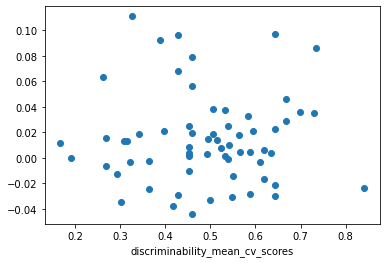

#### PostErrorSlowW1

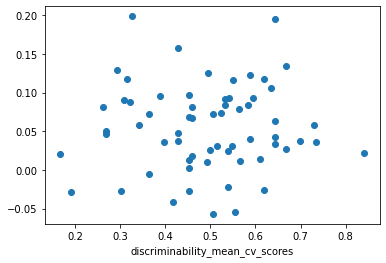

#### cancer_promoting_minus_preventing_FFQ

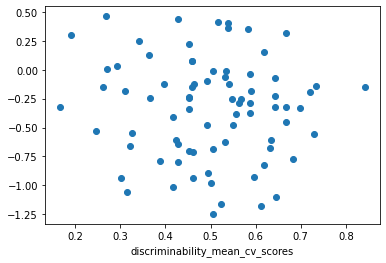

#### cancer_promoting_FFQ

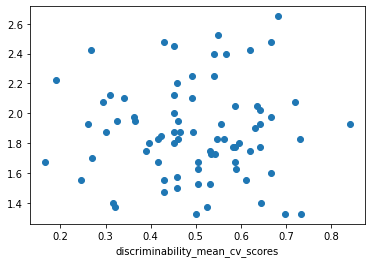

#### cancer_preventing_FFQ

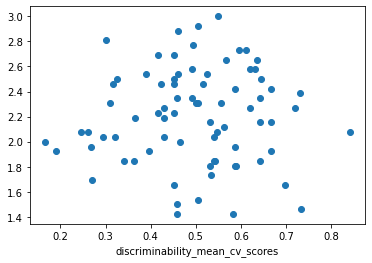

## harvardoxford-cortical_prob_Angular Gyrus

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

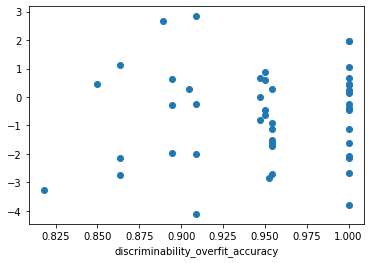

#### RTFS_factor_1

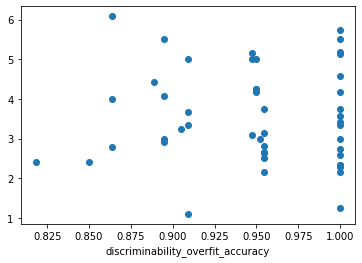

#### RTFS_factor_2

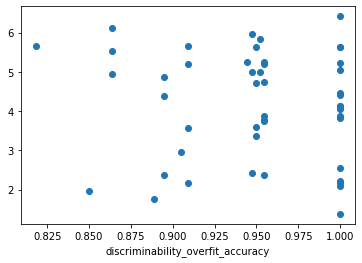

#### SST_SSRT

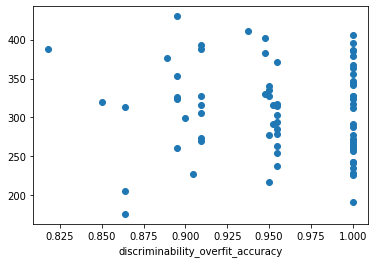

#### pes_mean_limited

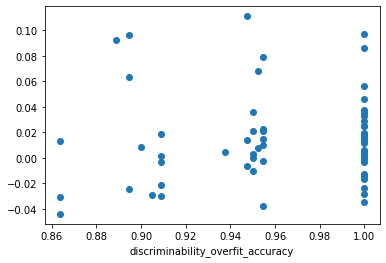

#### PostErrorSlowW1

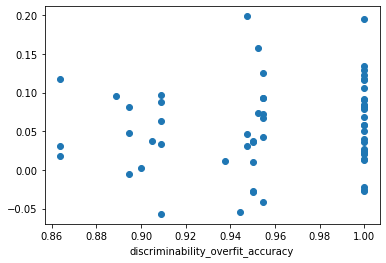

#### cancer_promoting_minus_preventing_FFQ

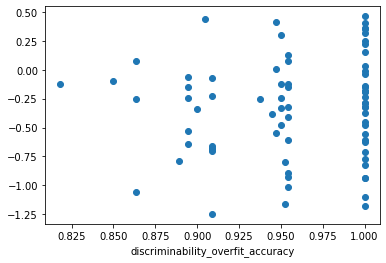

#### cancer_promoting_FFQ

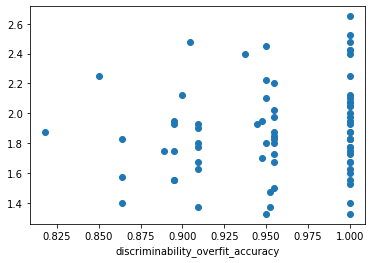

#### cancer_preventing_FFQ

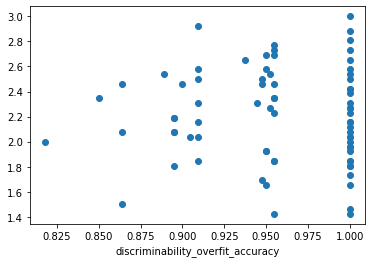

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

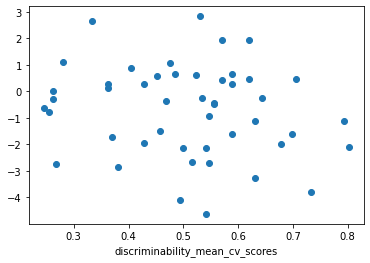

#### RTFS_factor_1

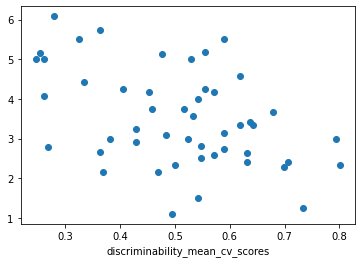

#### RTFS_factor_2

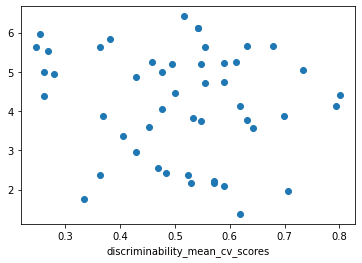

#### SST_SSRT

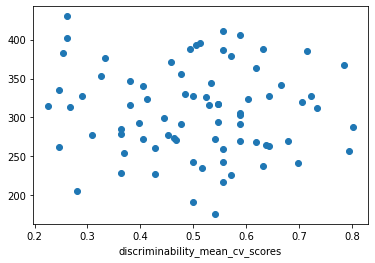

#### pes_mean_limited

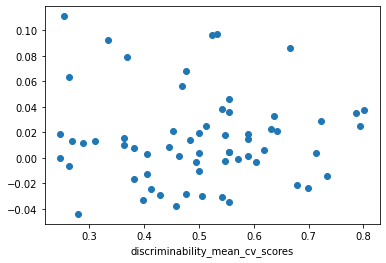

#### PostErrorSlowW1

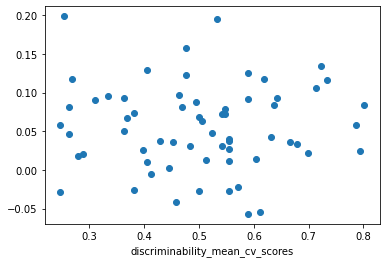

#### cancer_promoting_minus_preventing_FFQ

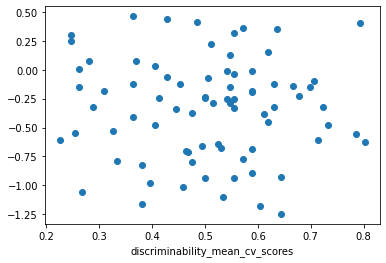

#### cancer_promoting_FFQ

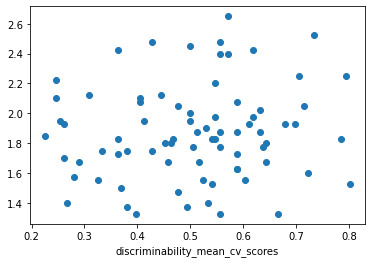

#### cancer_preventing_FFQ

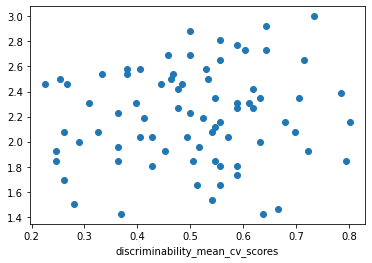

## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

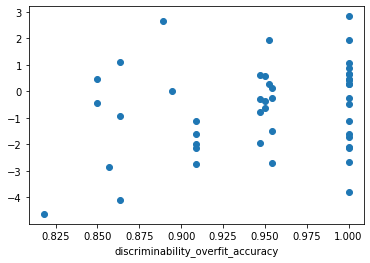

#### RTFS_factor_1

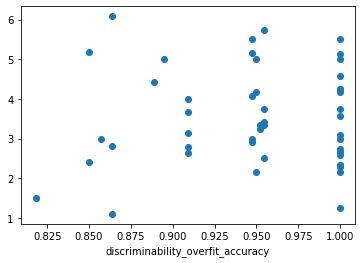

#### RTFS_factor_2

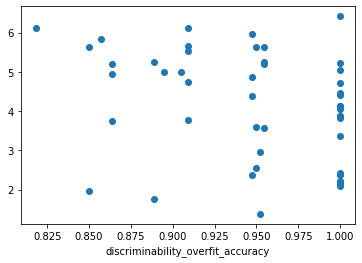

#### SST_SSRT

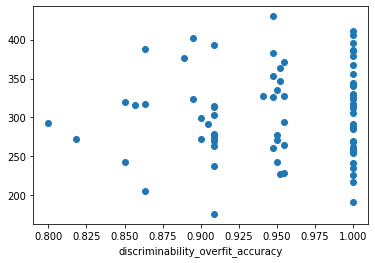

#### pes_mean_limited

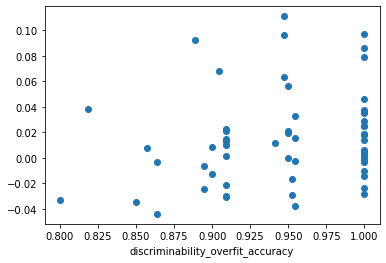

#### PostErrorSlowW1

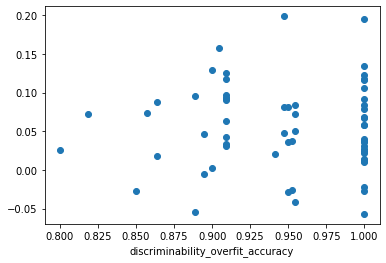

#### cancer_promoting_minus_preventing_FFQ

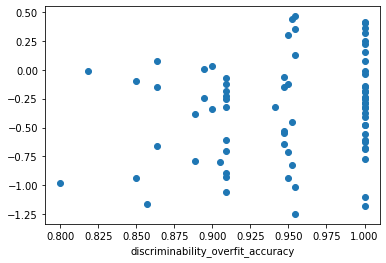

#### cancer_promoting_FFQ

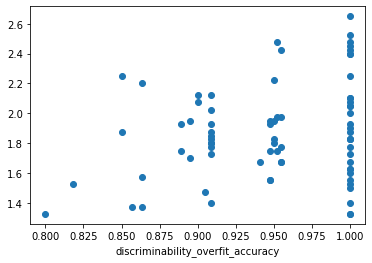

#### cancer_preventing_FFQ

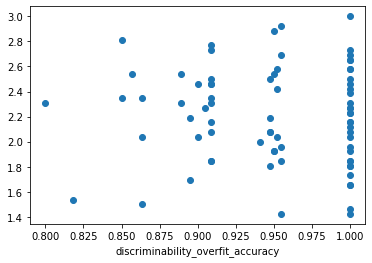

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

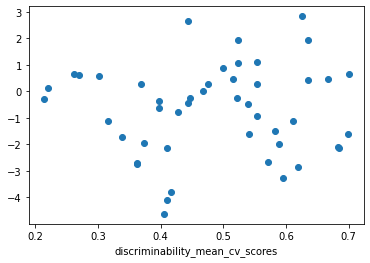

#### RTFS_factor_1

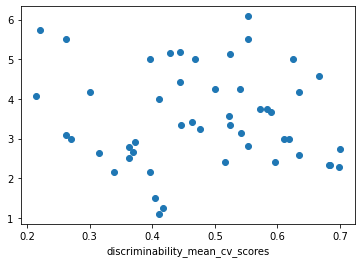

#### RTFS_factor_2

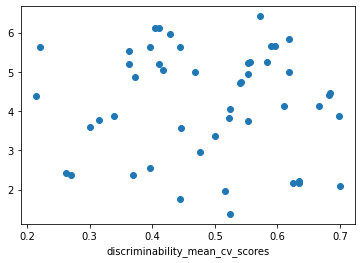

#### SST_SSRT

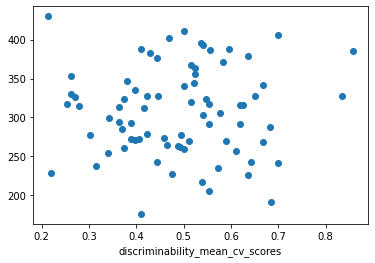

#### pes_mean_limited

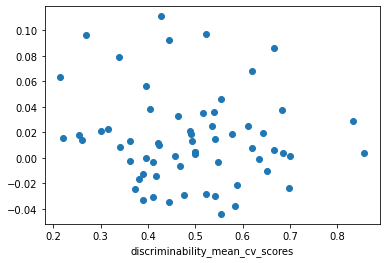

#### PostErrorSlowW1

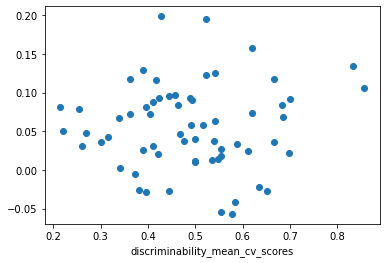

#### cancer_promoting_minus_preventing_FFQ

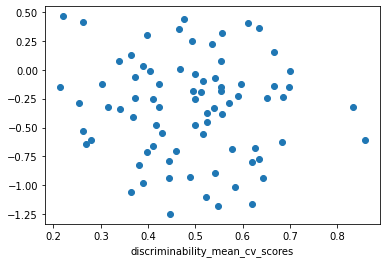

#### cancer_promoting_FFQ

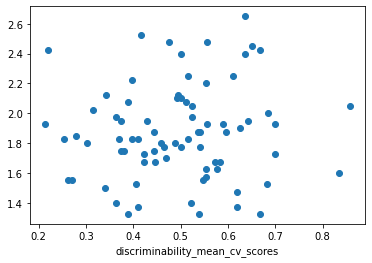

#### cancer_preventing_FFQ

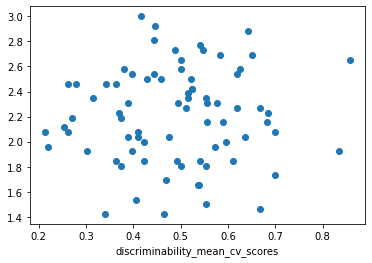

## harvardoxford-cortical_prob_Lateral Occipital Cortex, superior division

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

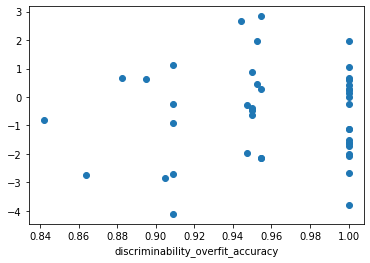

#### RTFS_factor_1

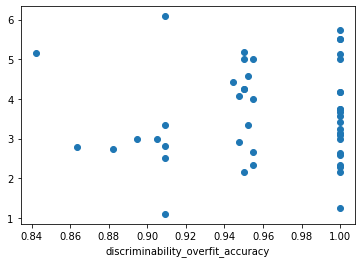

#### RTFS_factor_2

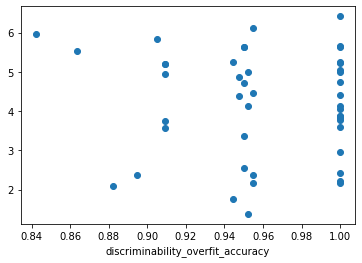

#### SST_SSRT

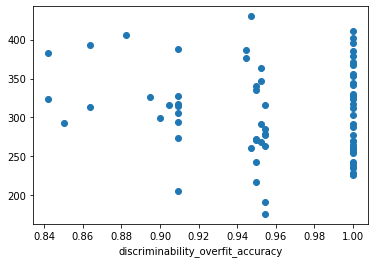

#### pes_mean_limited

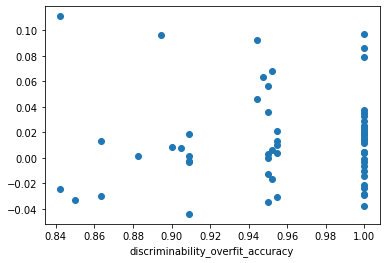

#### PostErrorSlowW1

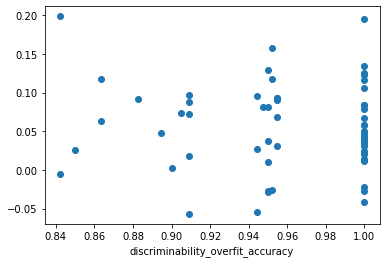

#### cancer_promoting_minus_preventing_FFQ

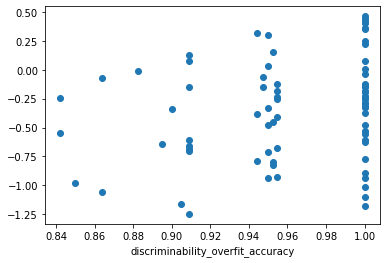

#### cancer_promoting_FFQ

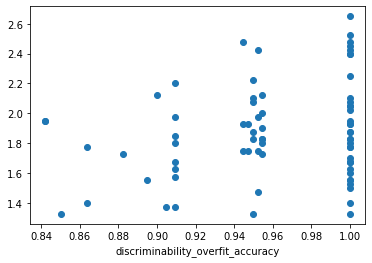

#### cancer_preventing_FFQ

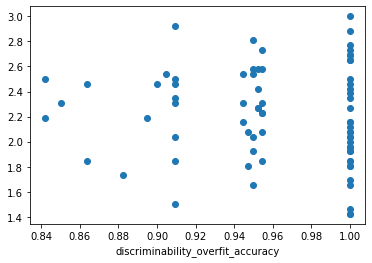

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

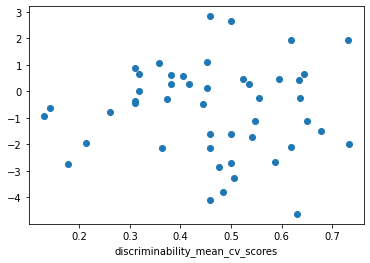

#### RTFS_factor_1

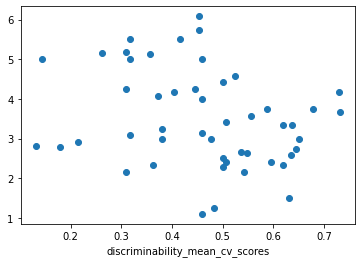

#### RTFS_factor_2

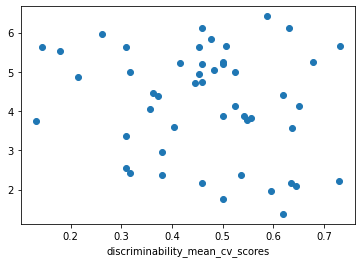

#### SST_SSRT

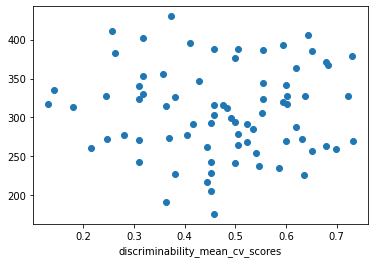

#### pes_mean_limited

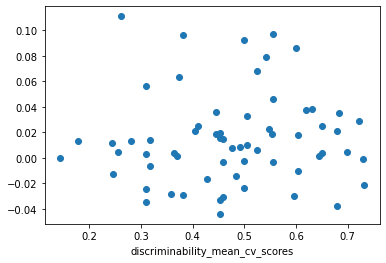

#### PostErrorSlowW1

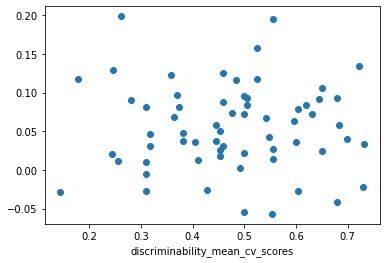

#### cancer_promoting_minus_preventing_FFQ

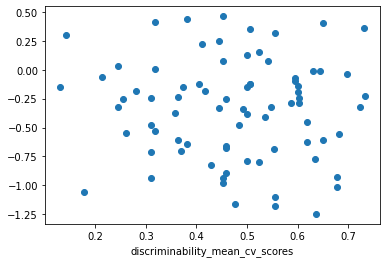

#### cancer_promoting_FFQ

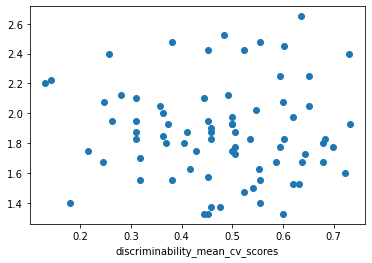

#### cancer_preventing_FFQ

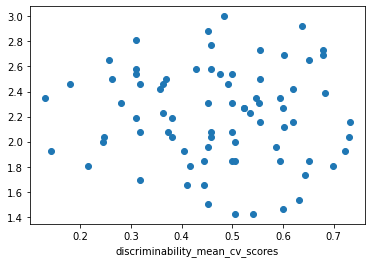

## harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars opercularis

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

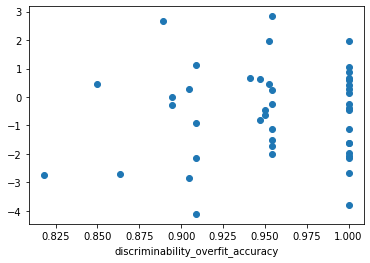

#### RTFS_factor_1

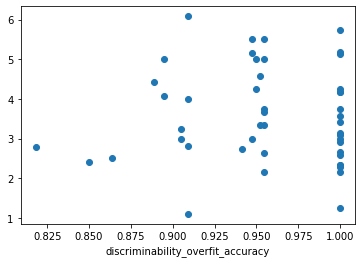

#### RTFS_factor_2

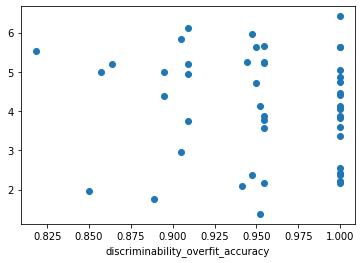

#### SST_SSRT

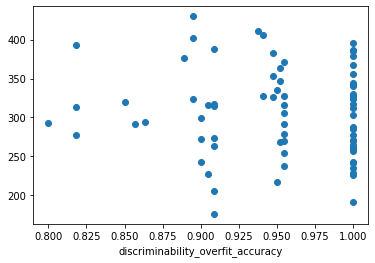

#### pes_mean_limited

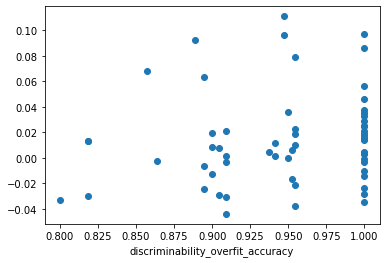

#### PostErrorSlowW1

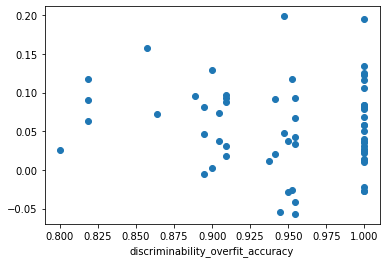

#### cancer_promoting_minus_preventing_FFQ

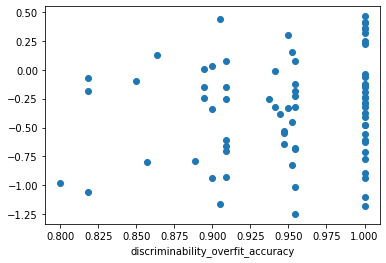

#### cancer_promoting_FFQ

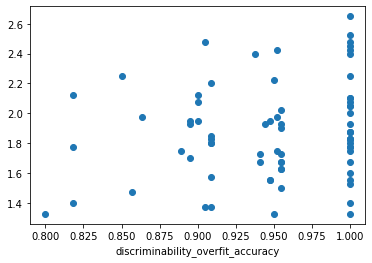

#### cancer_preventing_FFQ

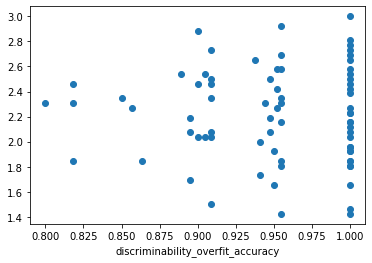

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

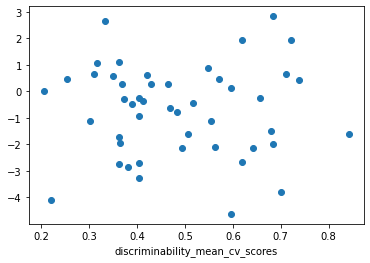

#### RTFS_factor_1

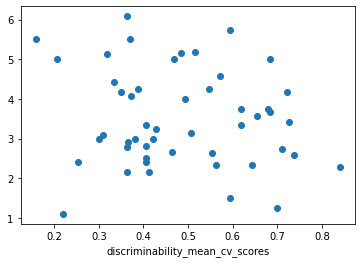

#### RTFS_factor_2

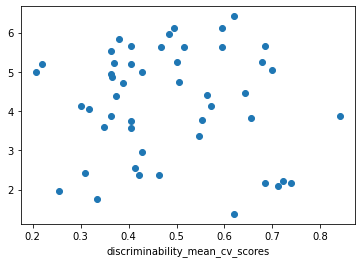

#### SST_SSRT

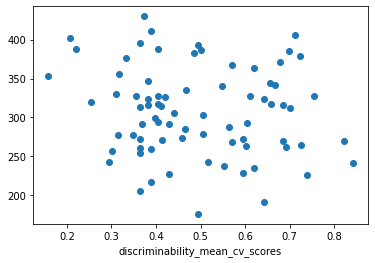

#### pes_mean_limited

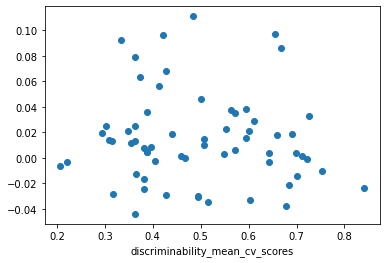

#### PostErrorSlowW1

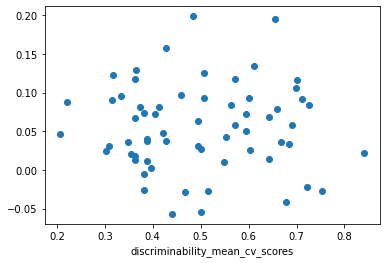

#### cancer_promoting_minus_preventing_FFQ

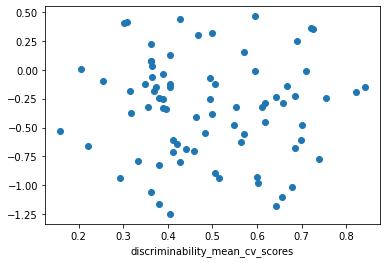

#### cancer_promoting_FFQ

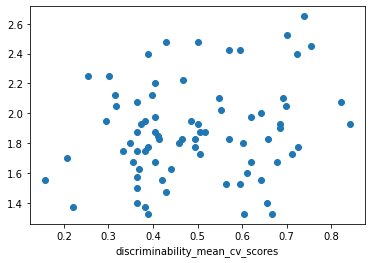

#### cancer_preventing_FFQ

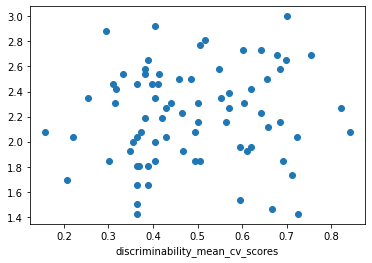

## harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars triangularis

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

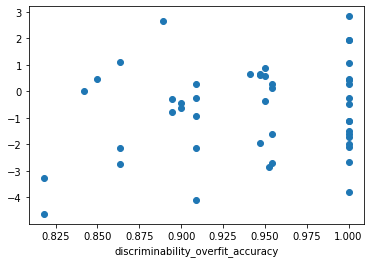

#### RTFS_factor_1

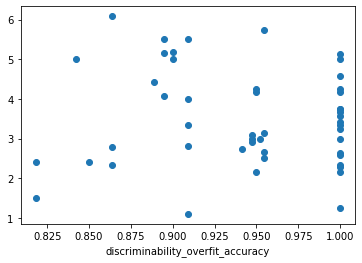

#### RTFS_factor_2

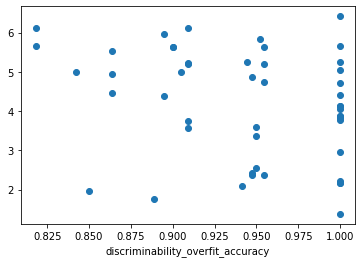

#### SST_SSRT

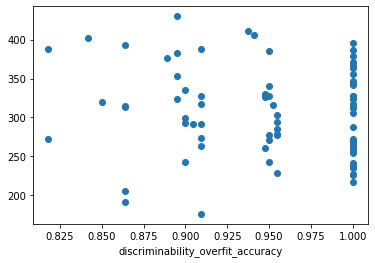

#### pes_mean_limited

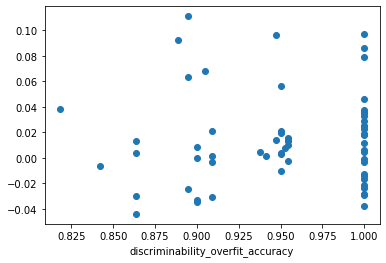

#### PostErrorSlowW1

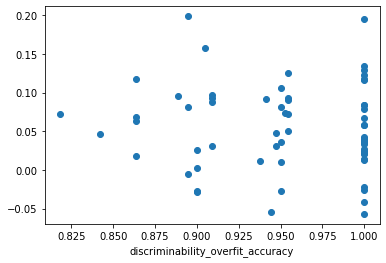

#### cancer_promoting_minus_preventing_FFQ

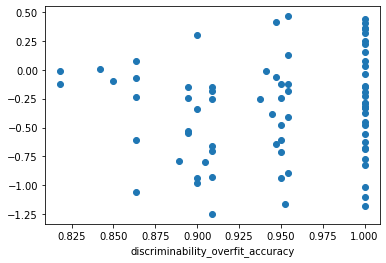

#### cancer_promoting_FFQ

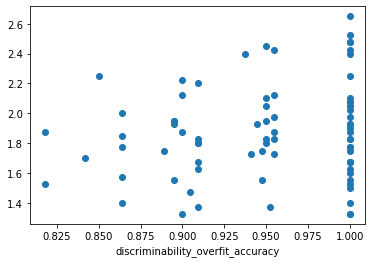

#### cancer_preventing_FFQ

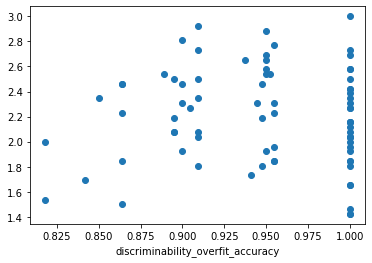

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

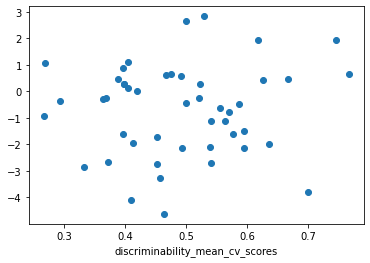

#### RTFS_factor_1

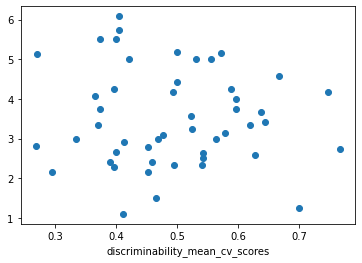

#### RTFS_factor_2

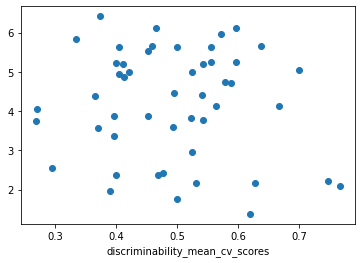

#### SST_SSRT

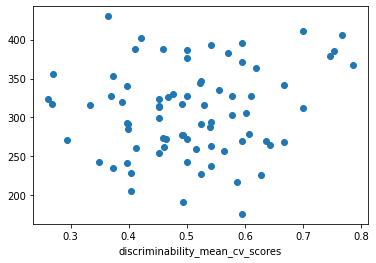

#### pes_mean_limited

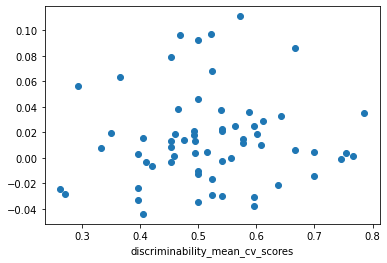

#### PostErrorSlowW1

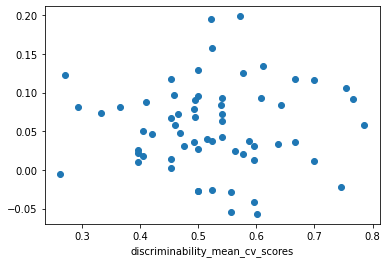

#### cancer_promoting_minus_preventing_FFQ

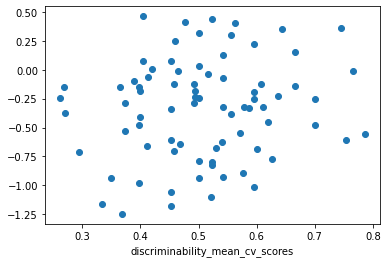

#### cancer_promoting_FFQ

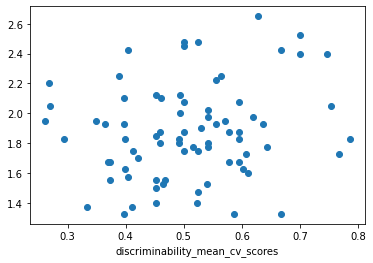

#### cancer_preventing_FFQ

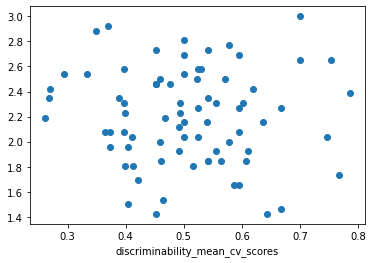

## harvardoxford-cortical_prob_Insular Cortex

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ', 'cancer_promoting_FCI',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=135)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

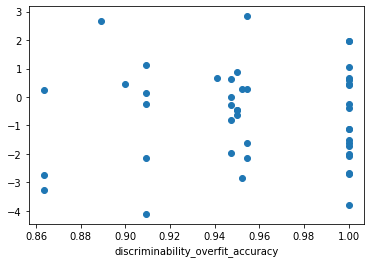

#### RTFS_factor_1

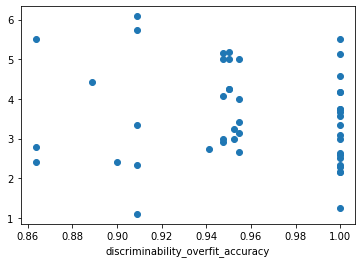

#### RTFS_factor_2

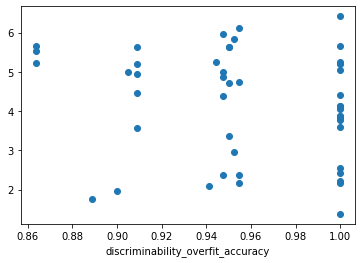

#### SST_SSRT

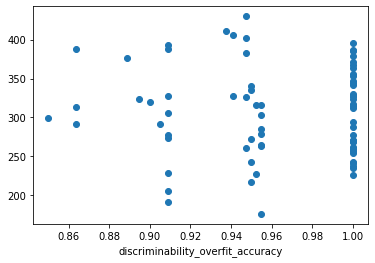

#### pes_mean_limited

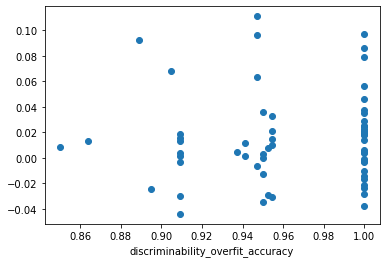

#### PostErrorSlowW1

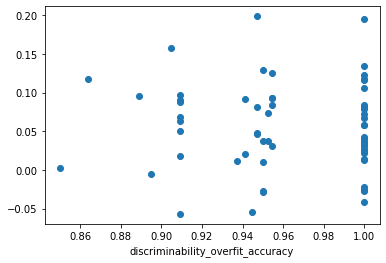

#### cancer_promoting_minus_preventing_FFQ

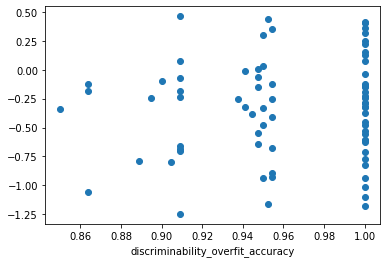

#### cancer_promoting_FFQ

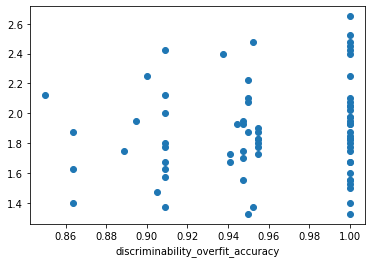

#### cancer_preventing_FFQ

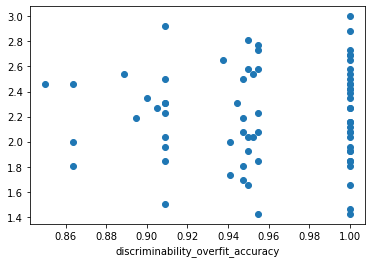

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

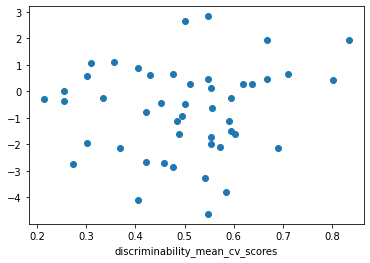

#### RTFS_factor_1

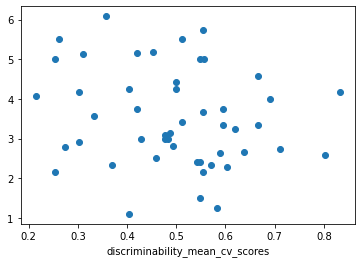

#### RTFS_factor_2

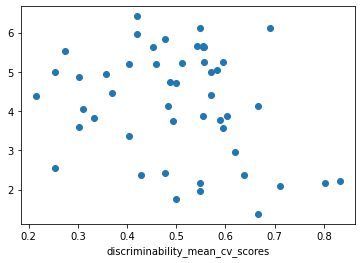

#### SST_SSRT

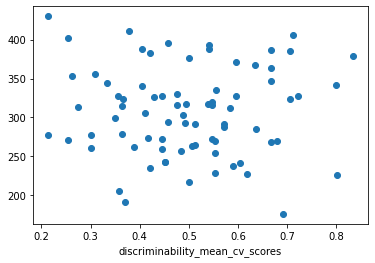

#### pes_mean_limited

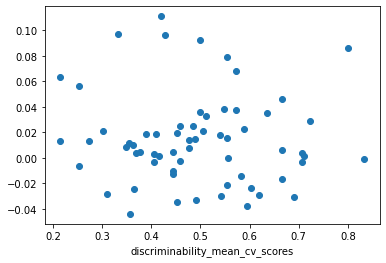

#### PostErrorSlowW1

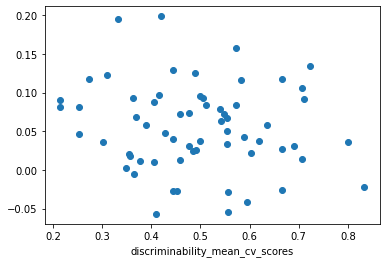

#### cancer_promoting_minus_preventing_FFQ

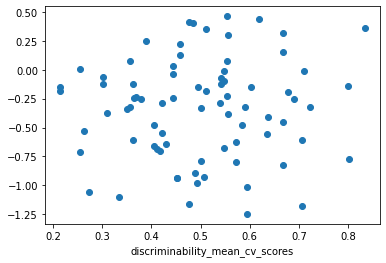

#### cancer_promoting_FFQ

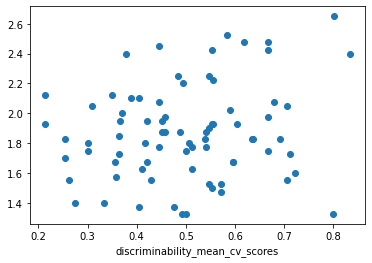

#### cancer_preventing_FFQ

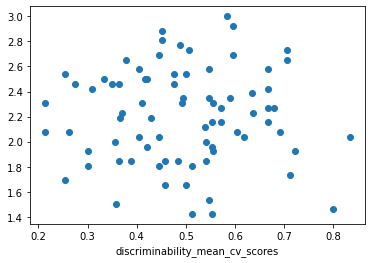

In [29]:
summary_across_mask_list = []
for mask_filepath in mask_list:

    mask_filename = os.path.basename(mask_filepath)
    mask_name = mask_filename.split(".")[0]
    
    display(Markdown("## " + mask_name))
    masked_analysis_filepath = (ml_data_folderpath + "/SST/discriminability_by_mask_" + 
        discriminability_version_id + "_" + mask_name + ".pkl")
        
    #go on to the next one if it doesn't exist
    if os.path.exists(masked_analysis_filepath)==False:
        print ("warning: " + masked_analysis_filepath + " does not exist.")
        continue
        
    with open(masked_analysis_filepath, 'rb') as handle:
        summary_results = pickle.load(handle)
        
    summary_results2 = summary_results.rename(columns={
        'mean_cv_scores':'discriminability_mean_cv_scores',
        'overfit_accuracy':'discriminability_overfit_accuracy'})
    
    ind_div_combined = get_ind_div_for_pes_combined(summary_results2,ml_data_folderpath)
    
    print(ind_div_combined.columns)
    
    ind_div_combined_3sd = remove_selected_outliers_rtfs_study(
        ind_div_combined,
        show_plot=False)
    
    tabular_summary = display_discriminability_correlations_rtfs(ind_div_combined_3sd)
    
    tabular_summary['mask_name']=mask_name
    
    summary_across_mask_list = summary_across_mask_list + [tabular_summary]
    
    
summary_across_masks = pd.concat(summary_across_mask_list)
    

    
    

In [30]:
summary_across_masks_cv = summary_across_masks.loc[summary_across_masks['neural_var']=='discriminability_mean_cv_scores'].copy()

In [31]:
fdr_corrected = fdrcorrection(summary_across_masks_cv["pearson's r p-value"],alpha=0.05)
summary_across_masks_cv["pearson's r p-value fdr-cor"] = fdr_corrected[1]

In [32]:
summary_across_masks_cv.loc[:,
                            ['correlate', "pearson's r", "pearson's r p-value","pearson's r p-value fdr-cor",
                             'mask_name']
                        ].sort_values("pearson's r p-value")

correlate  pearson's r  pearson's r p-value  \
10                          RTFS_factor_1    -0.445791             0.001327   
11                          RTFS_factor_2    -0.368711             0.009136   
10                          RTFS_factor_1    -0.323212             0.023497   
16                   cancer_promoting_FFQ     0.253646             0.026023   
10                          RTFS_factor_1    -0.301780             0.035089   
11                          RTFS_factor_2    -0.261849             0.069144   
11                          RTFS_factor_2    -0.257843             0.073665   
10                          RTFS_factor_1    -0.256310             0.075456   
11                          RTFS_factor_2    -0.253869             0.078378   
16                   cancer_promoting_FFQ     0.200222             0.080824   
11                          RTFS_factor_2    -0.251692             0.081060   
10                          RTFS_factor_1    -0.246952             0.087147   
15  cancer_promoting_minus_preventing_FFQ     0.194775             0.087480   
9                        RTFS_f1_minus_f2     0.250026             0.090080   
10                          RTFS_factor_1    -0.243710             0.091511   
16                   cancer_promoting_FFQ     0.193570             0.091645   
16                   cancer_promoting_FFQ     0.184643             0.107925   
17                  cancer_preventing_FFQ    -0.183989             0.109201   
16                   cancer_promoting_FFQ     0.180970             0.115241   
10                          RTFS_factor_1    -0.219044             0.130493   
9                        RTFS_f1_minus_f2     0.218689             0.139722   
11                          RTFS_factor_2    -0.211619             0.144377   
17                  cancer_preventing_FFQ     0.158198             0.169397   
14                        PostErrorSlowW1    -0.175223             0.169568   
10                          RTFS_factor_1    -0.194792             0.179845   
12                               SST_SSRT     0.151970             0.187035   
10                          RTFS_factor_1    -0.188597             0.194362   
11                          RTFS_factor_2    -0.180917             0.213492   
15  cancer_promoting_minus_preventing_FFQ     0.140445             0.220033   
11                          RTFS_factor_2    -0.177043             0.223623   
11                          RTFS_factor_2    -0.175766             0.227034   
14                        PostErrorSlowW1     0.149917             0.240898   
12                               SST_SSRT    -0.134837             0.242329   
9                        RTFS_f1_minus_f2    -0.169893             0.253583   
14                        PostErrorSlowW1     0.139839             0.274351   
17                  cancer_preventing_FFQ     0.122746             0.287554   
14                        PostErrorSlowW1    -0.136061             0.287654   
14                        PostErrorSlowW1     0.134249             0.294182   
17                  cancer_preventing_FFQ     0.119976             0.298652   
13                       pes_mean_limited     0.132330             0.301201   
14                        PostErrorSlowW1    -0.129353             0.312304   
11                          RTFS_factor_2    -0.145983             0.316888   
11                          RTFS_factor_2    -0.145385             0.318895   
10                          RTFS_factor_1    -0.144933             0.320417   
16                   cancer_promoting_FFQ     0.109984             0.340990   
17                  cancer_preventing_FFQ    -0.108304             0.348462   
17                  cancer_preventing_FFQ     0.106607             0.356108   
9                        RTFS_f1_minus_f2     0.136088             0.361713   
12                               SST_SSRT    -0.104641             0.365098   
12                               SST_SSRT     0.104638             0.365112   
15 

In [33]:
pd.set_option('display.max_rows', 200)

In [34]:
summary_across_masks_overfit = summary_across_masks.loc[summary_across_masks['neural_var']=='discriminability_overfit_accuracy'].copy()
fdr_corrected = fdrcorrection(summary_across_masks_overfit["pearson's r p-value"],alpha=0.05)
summary_across_masks_overfit["pearson's r p-value fdr-cor"] = fdr_corrected[1]

In [35]:
summary_across_masks_overfit.loc[:,
                            ['correlate', "pearson's r", "pearson's r p-value","pearson's r p-value fdr-cor",
                             'mask_name']
                        ].sort_values("pearson's r p-value")

correlate  pearson's r  pearson's r p-value  \
2                          RTFS_factor_2    -0.326471             0.025113   
2                          RTFS_factor_2    -0.307670             0.033394   
7                   cancer_promoting_FFQ     0.237377             0.038950   
6  cancer_promoting_minus_preventing_FFQ     0.232887             0.044354   
7                   cancer_promoting_FFQ     0.230645             0.048036   
2                          RTFS_factor_2    -0.276069             0.054846   
2                          RTFS_factor_2    -0.269497             0.066969   
6  cancer_promoting_minus_preventing_FFQ     0.205257             0.073328   
0                       RTFS_f1_minus_f2     0.264660             0.075493   
4                       pes_mean_limited     0.208529             0.100986   
7                   cancer_promoting_FFQ     0.190551             0.101517   
1                          RTFS_factor_1    -0.218483             0.140104   
7                   cancer_promoting_FFQ     0.167985             0.149693   
7                   cancer_promoting_FFQ     0.169825             0.153818   
7                   cancer_promoting_FFQ     0.164071             0.153912   
7                   cancer_promoting_FFQ     0.154835             0.184705   
6  cancer_promoting_minus_preventing_FFQ     0.152734             0.187777   
4                       pes_mean_limited     0.169489             0.191607   
5                        PostErrorSlowW1     0.175033             0.192824   
0                       RTFS_f1_minus_f2     0.196774             0.195126   
0                       RTFS_f1_minus_f2     0.191979             0.196093   
4                       pes_mean_limited     0.166384             0.196192   
5                        PostErrorSlowW1     0.162793             0.206159   
0                       RTFS_f1_minus_f2     0.189254             0.213088   
2                          RTFS_factor_2    -0.184960             0.213262   
7                   cancer_promoting_FFQ     0.145863             0.214960   
6  cancer_promoting_minus_preventing_FFQ     0.145622             0.218965   
4                       pes_mean_limited     0.163681             0.223751   
3                               SST_SSRT    -0.142945             0.224375   
2                          RTFS_factor_2    -0.175651             0.232409   
8                  cancer_preventing_FFQ     0.137943             0.234708   
4                       pes_mean_limited     0.152953             0.235291   
3                               SST_SSRT    -0.133765             0.246130   
8                  cancer_preventing_FFQ     0.141445             0.246330   
4                       pes_mean_limited     0.148970             0.247853   
7                   cancer_promoting_FFQ     0.134781             0.255585   
6  cancer_promoting_minus_preventing_FFQ     0.131063             0.265682   
1                          RTFS_factor_1    -0.167084             0.267061   
7                   cancer_promoting_FFQ     0.127397             0.276064   
2                          RTFS_factor_2    -0.153397             0.303278   
5                        PostErrorSlowW1     0.131338             0.308904   
6  cancer_promoting_minus_preventing_FFQ    -0.121933             0.314630   
5                        PostErrorSlowW1     0.129335             0.320505   
8                  cancer_preventing_FFQ     0.111745             0.339842   
7                   cancer_promoting_FFQ     0.109845             0.341601   
8                  cancer_preventing_FFQ     0.109690             0.342288   
2                          RTFS_factor_2    -0.137077             0.347620   
7                   cancer_promoting_FFQ     0.108483             0.354214   
1                          RTFS_factor_1    -0.133022             0.372732   
3                               SST_SSRT    -0.103602             0.376408   
5                        PostErrorSlowW1    -0.111935